# Datascience Mini Project

## 1: Data Wrangling

### 1.1: Import the essential libraries

In [1]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2: Loading the dataset

In [2]:
# Loading the Excel file
file_path = "mini_project_dataset.xlsx"
excel_data = pd.ExcelFile(file_path)

# Parsing the 'NEPSE Index by Sector' sheet, starting from the second row for the header
nepse_index_df = excel_data.parse('NEPSE Index', header=0, skiprows=1)

# Parseing the 'Market capitalization' sheet, starting from the third row for the header
market_cap_df = excel_data.parse('Market capitalization', header=0, skiprows=2)

### 1.3: Renaming the dataset

In [3]:
# Renaming columns with special case handling
def rename_columns(df, prefix):
    new_columns = {}
    for col in df.columns:
        if col != 'Date/Month':
            if "Insurance/" in col:
                initials = "I"
            elif "Non-Life" in col:
                initials = "NL"
            elif col == "Hydro":
                initials = "Hydro"
            elif "Mutual" in col:
                initials="Muf"
            else:
                parts = col.split()
                initials = ''.join(part[0] for part in parts if part.isalnum())
            # Ensuring unique initials to avoid conflicts 
            counter = 1
            original_initials = initials
            while f"{prefix}_{initials}" in new_columns.values():
                initials = f"{original_initials}{counter}"
                counter += 1
            new_columns[col] = f"{prefix}_{initials}"
        else:
            new_columns[col] = f"{prefix}_Date/Month"
    df.rename(columns=new_columns, inplace=True)

# Renaming columns in both dataframes
rename_columns(nepse_index_df, 'N')
rename_columns(market_cap_df, 'M')

### 1.4: Merging the dataset

In [4]:
# Filling empty cells with 0
nepse_index_df.fillna(0, inplace=True)
market_cap_df.fillna(0, inplace=True)

# Merging the two dataframes on 'Date/Month'
merged_df = pd.merge(nepse_index_df, market_cap_df, left_on='N_Date/Month', right_on='M_Date/Month', how='outer')

# Dropping the second 'Date/Month' column
merged_df.drop(columns=['M_Date/Month'], inplace=True)

# Renaming the remaining 'Date/Month' column back to 'Date/Month'
merged_df.rename(columns={'N_Date/Month': 'Date/Month'}, inplace=True)

# Dropping the 'N_1' column
merged_df.drop(columns=['N_1'], inplace=True, errors='ignore')

In [5]:
df= merged_df

### 1.5: Formating the date

In [6]:
df['Date/Month'] = pd.to_datetime(df['Date/Month'], format='%d-%b-%y')

# Formatting 'Date/Month' column as 'year-month-day'
df['Date/Month'] = df['Date/Month'].dt.strftime('%Y-%m-%d')


### 1.6: Checking and removing NULL values

In [7]:
# Checking for null values in the DataFrame
null_values = df.isnull()

# Counting the number of null values in each column
null_counts = null_values.sum()
null_counts

Date/Month    8
N_CB          8
N_D           8
N_F           8
N_MF          8
N_H           8
N_Hydro       8
N_MP          8
N_T           8
N_LI          8
N_NI          8
N_I           8
N_Muf         8
N_O           8
N_SF          8
N_SI          8
N_N           8
M_C           5
M_MP          5
M_H           5
M_O           5
M_Hydro       5
M_T           5
M_LI          5
M_NI          5
M_F           5
M_MF          5
M_D           5
M_I           5
M_T1          5
dtype: int64

In [8]:
# Dropping rows with null values
df.dropna(inplace=True)

In [9]:
# Re-Checking for null values in the DataFrame
null_values = df.isnull()

# Re-Counting the number of null values in each column
null_counts = null_values.sum()
null_counts

Date/Month    0
N_CB          0
N_D           0
N_F           0
N_MF          0
N_H           0
N_Hydro       0
N_MP          0
N_T           0
N_LI          0
N_NI          0
N_I           0
N_Muf         0
N_O           0
N_SF          0
N_SI          0
N_N           0
M_C           0
M_MP          0
M_H           0
M_O           0
M_Hydro       0
M_T           0
M_LI          0
M_NI          0
M_F           0
M_MF          0
M_D           0
M_I           0
M_T1          0
dtype: int64

In [10]:
# Replacing Abbreviations
df.rename(columns={"N_N": "nepse_index"}, inplace=True)
df.rename(columns={"N_SF":"sensitive_float"},inplace=True)
df.rename(columns={"N_SI":"sensitive_index"},inplace=True)
df.rename(columns={"M_T1":"marketcap_total"},inplace=True)

In [11]:
# Saveing the merged dataframe to the specified path
desktop_path = "./"

# Specifying the file path for saving the CSV file
output_csv_file_path = os.path.join(desktop_path, "merged_nepse_market_cap.csv")

# Saveing the DataFrame to a CSV file
df.to_csv(output_csv_file_path, index=False)

### 1.7: Normalizing the data

#### 1.7.1: MinMax Normalization

In [12]:
numeric_data = df.select_dtypes(include=[float, int])

# Normalizing the data to a range of 0 to 1
min_max_scaler = MinMaxScaler()
normalized_data = pd.DataFrame(min_max_scaler.fit_transform(numeric_data), columns=numeric_data.columns, index=df.index)

# Combining the normalized data with the original date index
normalized_data = pd.concat([normalized_data], axis=1)

In [13]:
normalized_data

N_CB       N_D       N_F      N_MF       N_H   N_Hydro      N_MP  \
0     0.008819  0.017657  0.005130  0.000000  0.004129  0.000000  0.007280   
1     0.008749  0.016963  0.005010  0.000000  0.004129  0.000000  0.007280   
2     0.008342  0.016963  0.004546  0.000000  0.004129  0.000000  0.007280   
3     0.008307  0.016857  0.004246  0.000000  0.004129  0.000000  0.007280   
4     0.008272  0.016792  0.004252  0.000000  0.004129  0.000000  0.007280   
...        ...       ...       ...       ...       ...       ...       ...   
4777  0.451794  0.611662  0.523501  0.594717  0.844152  0.655934  0.872272   
4778  0.454788  0.616477  0.525119  0.599570  0.841972  0.663477  0.873729   
4779  0.458882  0.623378  0.533380  0.624832  0.851815  0.662678  0.881971   
4780  0.475947  0.637432  0.546872  0.656434  0.886466  0.669288  0.903283   
4781  0.475374  0.639805  0.561045  0.659361  0.876028  0.661981  0.901962   

           N_T      N_LI      N_NI  ...       M_O   M_Hydro       M_T  \
0     0.000059  0.005362  0.000000  ...  0.003751  0.000000  0.000051   
1     0.000059  0.005378  0.000000  ...  0.003751  0.000000  0.000051   
2     0.000000  0.005395  0.000000  ...  0.003751  0.000000  0.000000   
3     0.000000  0.005381  0.000000  ...  0.003751  0.000000  0.000000   
4     0.000000  0.005395  0.000000  ...  0.003751  0.000000  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
4777  0.598041  0.523980  0.673496  ...  0.487978  0.928944  0.599103   
4778  0.596442  0.525968  0.684033  ...  0.491350  0.939627  0.597508   
4779  0.600510  0.535960  0.693223  ...  0.492755  0.938494  0.601567   
4780  0.611027  0.566064  0.715091  ...  0.500820  0.947856  0.612061   
4781  0.611675  0.566625  0.711119  ...  0.503166  0.937508  0.612708   

          M_LI      M_NI       M_F      M_MF       M_D       M_I  \
0     0.003594  0.000000  0.004488  0.000000  0.000000  0.000000   
1     0.003601  0.000000  0.004445  0.000000  0.000000  0.000000   
2     0.003609  0.000000  0.004276  0.000000  0.000000  0.000000   
3     0.003603  0.000000  0.004167  0.000000  0.000000  0.000000   
4     0.003609  0.000000  0.004169  0.000000  0.000003  0.000000   
...        ...       ...       ...       ...       ...       ...   
4777  0.744628  0.662632  0.538956  0.606285  0.528983  0.634634   
4778  0.747422  0.673000  0.540501  0.611233  0.533001  0.637475   
4779  0.761469  0.682042  0.548387  0.636986  0.538759  0.645577   
4780  0.803786  0.703556  0.561266  0.669203  0.550487  0.657669   
4781  0.804575  0.699648  0.574796  0.672187  0.552467  0.657157   

      marketcap_total  
0            0.000067  
1            0.000063  
2            0.000100  
3            0.000034  
4            0.000033  
...               ...  
4777         0.707239  
4778         0.712032  
4779         0.719867  
4780         0.740628  
4781         0.739745  

[4769 rows x 29 columns]

#### 1.7.2: Z-Score Normalization

In [14]:
# Z-score normalization
scaler = StandardScaler()
normalized_data_zscore = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns, index=df.index)

# Combining the normalized data with the original date index
normalized_data_zscore = pd.concat([normalized_data_zscore], axis=1)

In [15]:
normalized_data_zscore

N_CB       N_D       N_F      N_MF       N_H   N_Hydro      N_MP  \
0    -1.374520 -0.832899 -0.892311 -0.580692 -0.924115 -1.392716 -0.842128   
1    -1.374814 -0.836250 -0.892968 -0.580692 -0.924115 -1.392716 -0.842128   
2    -1.376512 -0.836250 -0.895528 -0.580692 -0.924115 -1.392716 -0.842128   
3    -1.376659 -0.836760 -0.897182 -0.580692 -0.924115 -1.392716 -0.842128   
4    -1.376805 -0.837074 -0.897146 -0.580692 -0.924115 -1.392716 -0.842128   
...        ...       ...       ...       ...       ...       ...       ...   
4777  0.476587  2.036266  1.964113  1.555873  2.967865  1.381853  2.668653   
4778  0.489099  2.059525  1.973028  1.573309  2.957766  1.413760  2.674569   
4779  0.506206  2.092856  2.018553  1.664065  3.003370  1.410378  2.708019   
4780  0.577517  2.160740  2.092898  1.777599  3.163914  1.438340  2.794519   
4781  0.575123  2.172204  2.170998  1.788114  3.115550  1.407431  2.789159   

           N_T      N_LI      N_NI  ...       M_O   M_Hydro       M_T  \
0    -0.552980 -0.864918 -0.565607  ... -1.056886 -0.722865 -0.558556   
1    -0.552980 -0.864855 -0.565607  ... -1.056886 -0.722865 -0.558556   
2    -0.553258 -0.864789 -0.565607  ... -1.056886 -0.722865 -0.558796   
3    -0.553258 -0.864842 -0.565607  ... -1.056886 -0.722865 -0.558796   
4    -0.553258 -0.864789 -0.565607  ... -1.056886 -0.722865 -0.558796   
...        ...       ...       ...  ...       ...       ...       ...   
4777  2.250319  1.193549  1.919934  ...  2.028071  3.230087  2.250181   
4778  2.242824  1.201437  1.958822  ...  2.049555  3.275545  2.242703   
4779  2.261895  1.241100  1.992739  ...  2.058502  3.270727  2.261733   
4780  2.311196  1.360583  2.073440  ...  2.109884  3.310564  2.310937   
4781  2.314235  1.362811  2.058781  ...  2.124829  3.266528  2.313970   

          M_LI      M_NI       M_F      M_MF       M_D       M_I  \
0    -0.907891 -0.558192 -1.415440 -0.566115 -1.016362 -0.410360   
1    -0.907866 -0.558192 -1.415658 -0.566115 -1.016362 -0.410360   
2    -0.907839 -0.558192 -1.416509 -0.566115 -1.016362 -0.410360   
3    -0.907860 -0.558192 -1.417058 -0.566115 -1.016362 -0.410360   
4    -0.907839 -0.558192 -1.417048 -0.566115 -1.016349 -0.410360   
...        ...       ...       ...       ...       ...       ...   
4777  1.631391  1.918243  1.273528  1.617433  1.076961  2.336384   
4778  1.640963  1.956989  1.281298  1.635252  1.092862  2.348681   
4779  1.689098  1.990781  1.320977  1.728003  1.115649  2.383748   
4780  1.834106  2.071187  1.385772  1.844034  1.162057  2.436082   
4781  1.836809  2.056582  1.453841  1.854780  1.169894  2.433868   

      marketcap_total  
0           -0.988070  
1           -0.988085  
2           -0.987940  
3           -0.988200  
4           -0.988203  
...               ...  
4777         1.807024  
4778         1.825969  
4779         1.856939  
4780         1.938995  
4781         1.935507  

[4769 rows x 29 columns]

### 1.8: Check for duplicate values

In [16]:
# Checking for duplicate rows based on a subset of columns
columns_to_check = ['Date/Month']  # Add or modify columns as needed
duplicate_rows_subset = df.duplicated(subset=columns_to_check)

# Counting the number of duplicate rows in the subset
duplicate_count_subset = duplicate_rows_subset.sum()

# Printing duplicate rows in the subset if any
duplicate_rows_subset_data = df[duplicate_rows_subset]

print(f"Number of duplicate rows in subset: {duplicate_count_subset}")
if duplicate_count_subset > 0:
    print("Duplicate rows in subset:")
    print(duplicate_rows_subset_data)


Number of duplicate rows in subset: 17
Duplicate rows in subset:
      Date/Month        N_CB          N_D          N_F  N_MF         N_H  \
1225  2008-10-19  965.290000  1392.730000  1211.260000   0.0  359.290000   
1227  2008-10-20  940.960000  1379.090000  1199.020000   0.0  366.230000   
1229  2008-10-21  954.060000  1393.590000  1197.330000   0.0  364.690000   
1231  2008-10-22  959.620000  1391.930000  1196.400000   0.0  364.690000   
1233  2008-10-23  966.400000  1395.590000  1214.390000   0.0  364.690000   
1235  2008-10-26  965.860000  1403.050000  1111.550000   0.0  364.690000   
1237  2008-10-27  899.060000  1397.780000  1104.010000   0.0  364.690000   
1239  2008-11-02  845.050000  1389.970000  1103.760000   0.0  364.690000   
1241  2008-11-03  843.180000  1381.610000  1094.980000   0.0  364.690000   
1243  2008-11-05  840.220000  1379.450000  1093.050000   0.0  364.690000   
1245  2008-11-06  826.560000  1252.760000  1069.030000   0.0  364.690000   
1247  2008-11-09  800.1

In [17]:
# Removing duplicate rows
df_no_duplicates = df.drop_duplicates()

# Removing duplicate rows based on a subset of columns
df_no_duplicates_subset = df.drop_duplicates(subset=columns_to_check)

In [18]:
df_no_duplicates.duplicated().sum()

0

## 2: Exploratory Data Analysis

### 2.1: Summary Statistics

In [19]:
df.describe()

N_CB          N_D          N_F         N_MF          N_H  \
count  4769.000000  4769.000000  4769.000000  4769.000000  4769.000000   
mean    855.025902  1308.670079   709.842955   967.067474  1376.697690   
std     477.086182  1274.214496   562.545783  1665.544757  1277.050144   
min     181.750000   138.830000   192.030000     0.000000   172.250000   
25%     419.140000   286.200000   272.630000     0.000000   364.300000   
50%     810.980000   809.470000   565.226900     0.000000   704.490000   
75%    1208.799400  1695.656100   802.280000  1500.005200  2022.520000   
max    2175.192500  6292.893900  3291.549500  5982.970900  6088.439000   

           N_Hydro         N_MP          N_T          N_LI          N_NI  ...  \
count  4769.000000  4769.000000  4769.000000   4769.000000   4769.000000  ...   
mean   1275.655932  1828.127873   630.580561   4349.977745   2373.433476  ...   
std     916.044621  1874.019110   969.432789   4751.629612   4196.701618  ...   
min       0.000000   194.760000    94.290000    139.520000      0.000000  ...   
25%     657.733331   418.800000   169.360000    485.094732      0.000000  ...   
50%    1152.103400   886.410000   207.970000   1312.750000      0.000000  ...   
75%    2041.670000  2439.252600   276.768030   7493.050000   4948.660500  ...   
max    3874.415600  7800.130800  4638.454500  18997.415000  15486.327800  ...   

                 M_O        M_Hydro           M_T           M_LI  \
count    4769.000000    4769.000000   4769.000000    4769.000000   
mean   114518.403869   89426.684655   3645.811125  108831.021464   
std    105952.346465  123724.462909   5654.087890  117253.746085   
min        18.670000       0.000000    486.660000     944.700000   
25%     56418.423187   15622.151905    985.680000    9358.700000   
50%     93016.900000   37817.880000   1207.630000   40445.830000   
75%    147633.460000   85764.980000   1587.046008  204822.380000   
max    674958.920000  526431.740000  26993.840000  402692.670000   

                M_NI            M_F           M_MF            M_D  \
count    4769.000000    4769.000000    4769.000000    4769.000000   
mean    44288.312948   32059.134508   68992.894410   69739.640872   
std     79350.697890   20844.164570  121883.511653   68557.967825   
min         0.000000    2087.930000       0.000000      67.260000   
25%         0.000000   18994.500000       0.000000   22563.570000   
50%         0.000000   27780.898147       0.000000   29972.730000   
75%     85227.670000   48358.320000   95383.650000  103773.980000   
max    296523.810000  106946.260000  438920.140000  271340.500000   

                 M_I  marketcap_total  
count    4769.000000     4.769000e+03  
mean    35615.408650     1.143512e+06  
std     86799.730222     1.121849e+06  
min         0.000000     3.486654e+04  
25%         0.000000     2.953729e+05  
50%         0.000000     5.603824e+05  
75%         0.000000     1.695045e+06  
max    375636.560000     4.468505e+06  

[8 rows x 29 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4769 entries, 0 to 4781
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date/Month       4769 non-null   object 
 1   N_CB             4769 non-null   float64
 2   N_D              4769 non-null   float64
 3   N_F              4769 non-null   float64
 4   N_MF             4769 non-null   float64
 5   N_H              4769 non-null   float64
 6   N_Hydro          4769 non-null   float64
 7   N_MP             4769 non-null   float64
 8   N_T              4769 non-null   float64
 9   N_LI             4769 non-null   float64
 10  N_NI             4769 non-null   float64
 11  N_I              4769 non-null   float64
 12  N_Muf            4769 non-null   float64
 13  N_O              4769 non-null   float64
 14  sensitive_float  4769 non-null   float64
 15  sensitive_index  4769 non-null   float64
 16  nepse_index      4769 non-null   float64
 17  M_C              47

In [21]:
# Mapping abbreviations to full names
abbreviation_to_fullname = {
    'N_LI': 'Nepse- Life Insurance',
    'N_NI': 'Nepse- Non-life Insurance',
    'N_LI': 'Nepse- Life Insurance',
    'N_MF':'Nepse- Mutual Fund',
    'N_F':'Nepse- Finance',
    'N_MP':'Nepse- Manufacturing and Processing',
    'N_Muf': 'Nepse- Mutual Fund',
    'N_O': 'Nepse- Others',
    'N_I':'Nepse- Investment Index',
    'N_Hydro':'Hydropower',
    'N_D':'Nepse- Development Bank',
    'N_CB': 'Nepse- Commercial Banks',
    'N_H':'Nepse Hotel',
    'N_T':'Nepse Trading',
    'M_C': 'Market Cap - Commercial Banks',
    'M_MP': 'Market Cap - Manufacturing and Processing',
    'M_Hydro': 'Market Cap - Hydropower',
    'M_O': 'Market Cap - Others',
    'M_Hydro': 'Market Cap - Hydropower',
    'M_T': 'Market Cap - Trading',
    'M_LI': 'Market Cap - Life Insurance',
    'M_NI': 'Market Cap - Non-life Insurance',
    'M_F': 'Market Cap - Finance',
    'M_MF': 'Market Cap - Mutual Funds',
    'M_D': 'Market Cap - Development Banks',
    'M_I': 'Market Cap - Investment',
    'M_H':'Market Cap - Hotel',
}

By Specifying this eary, we can just use the variable "abbreviation_to_fullname" in future codes


### 2.2: Time Series Plot

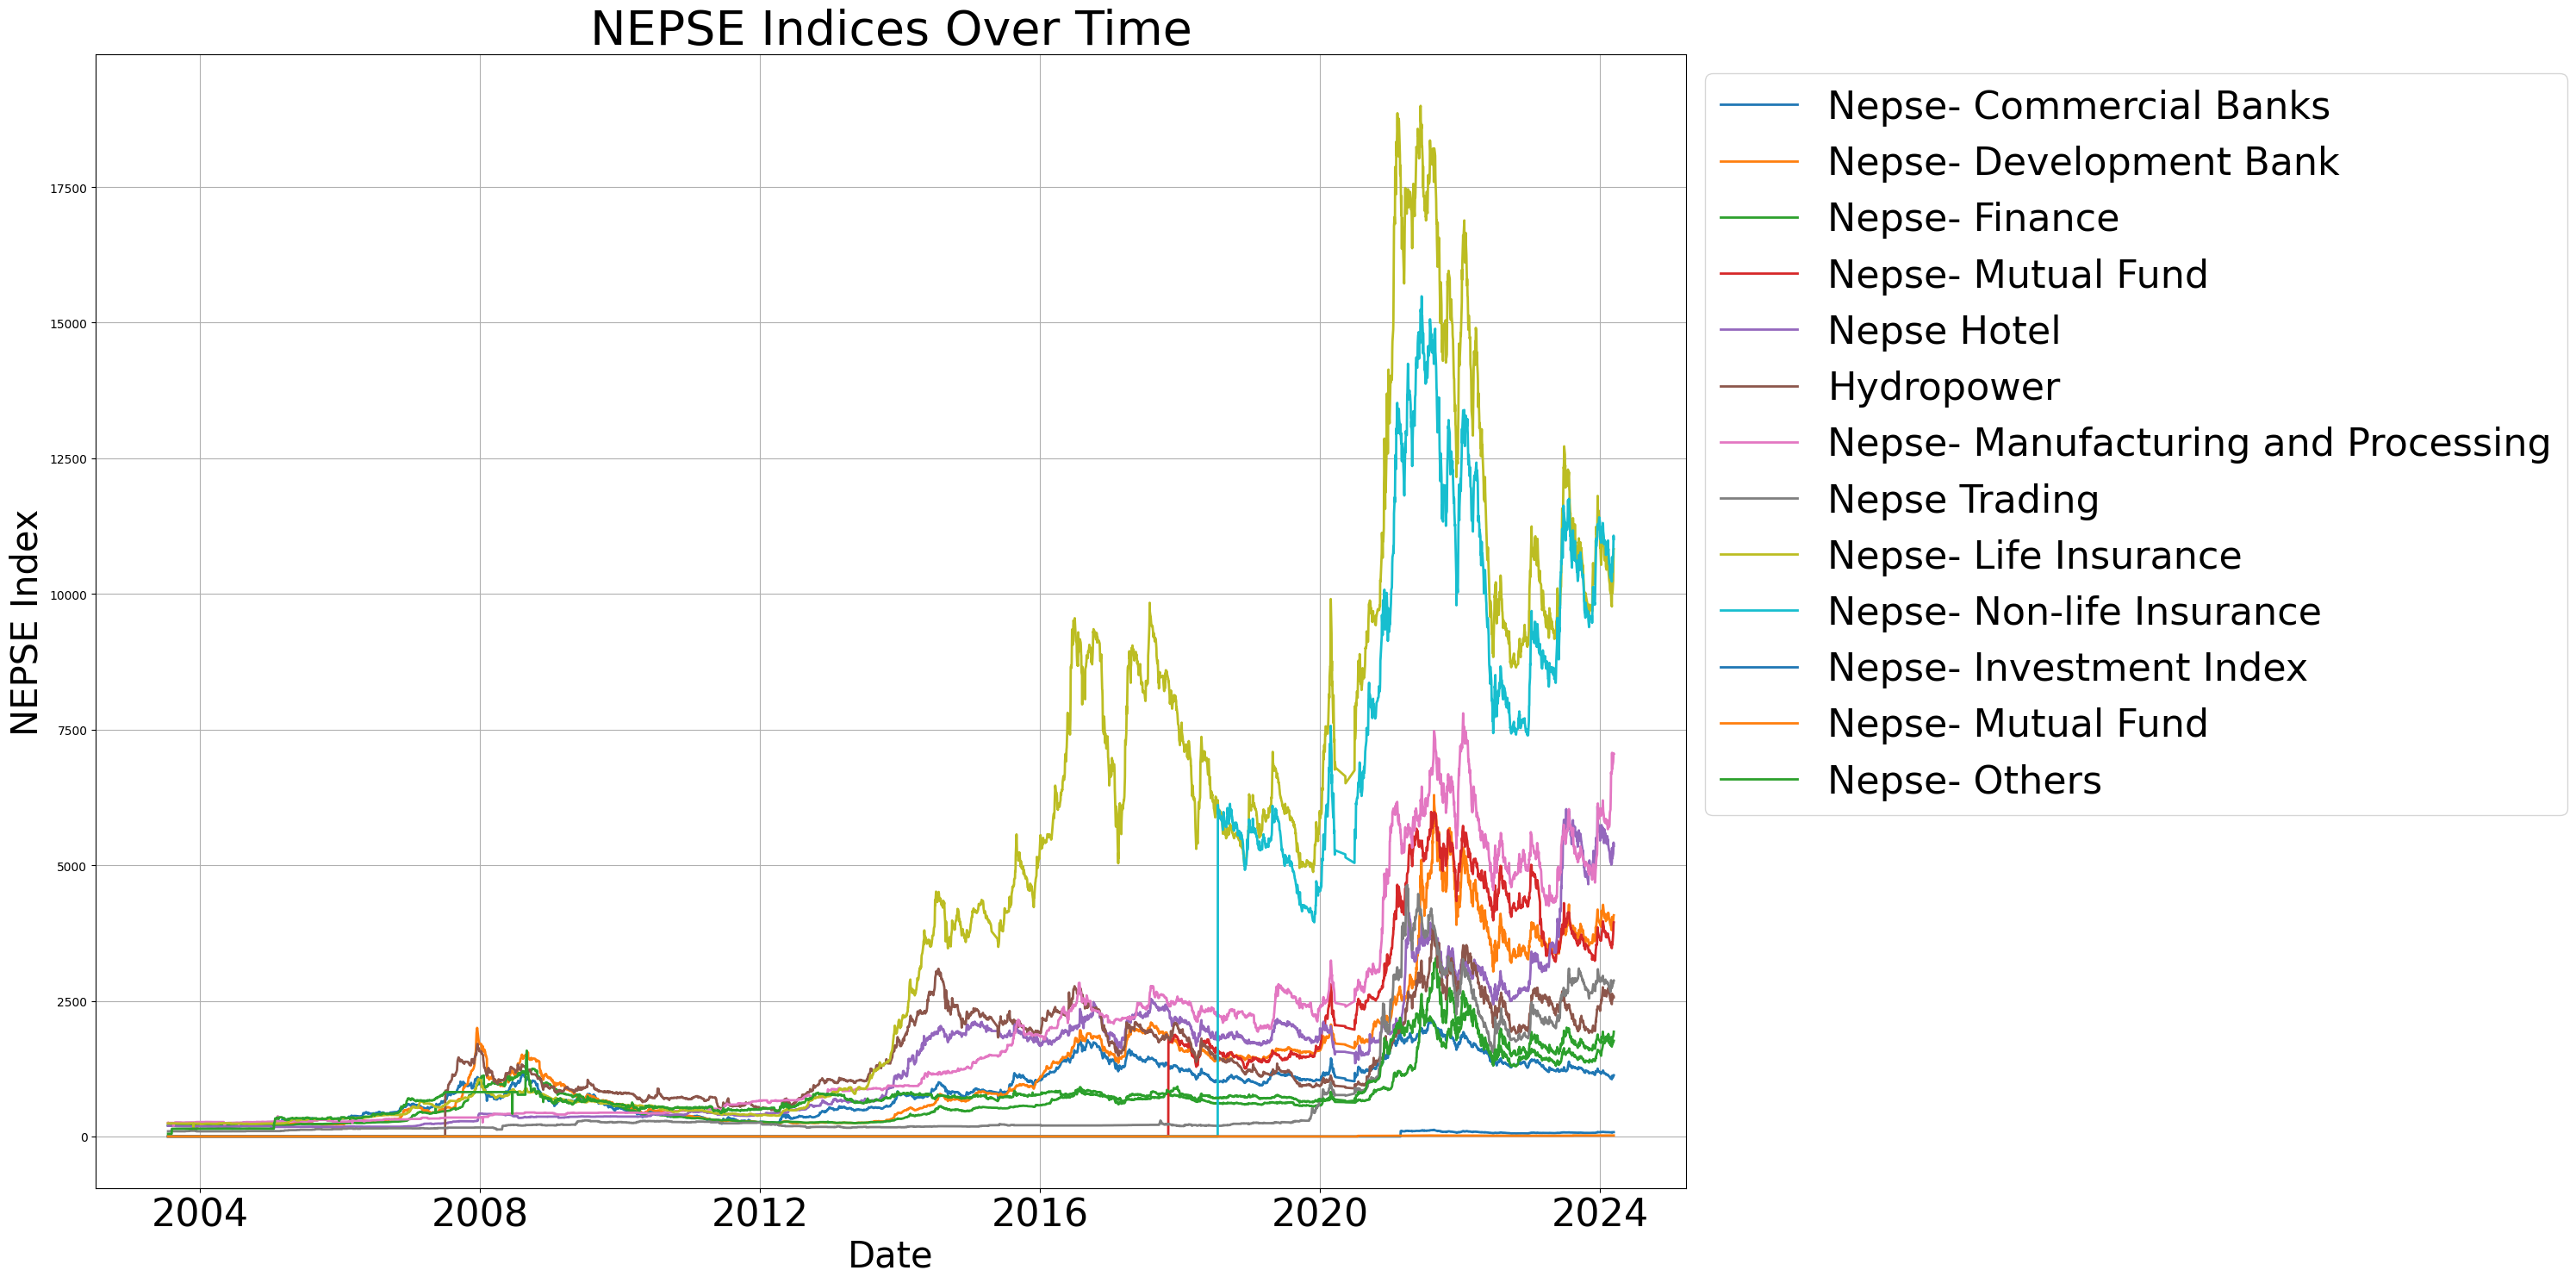

In [22]:
# Converting the Date/Month column to datetime format
df['Date/Month'] = pd.to_datetime(df['Date/Month'])

# Plotting NEPSE indices for all columns starting with 'N_'
plt.figure(figsize=(30, 15))
nepse_columns = [col for col in df.columns if col.startswith('N_')]

for column in nepse_columns:
    plt.plot(df['Date/Month'], df[column], label=abbreviation_to_fullname.get(column, column), linewidth=2)

# Customizing the plot for better readability
plt.xlabel('Date', fontsize=30)
plt.ylabel('NEPSE Index', fontsize=30)
plt.title('NEPSE Indices Over Time', fontsize=40)
plt.legend(fontsize=32, loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(fontsize=32)  
plt.grid(True)
plt.tight_layout()

# Printing the plot
plt.show()



Here we can see the trend of growth in Nepse Index of various sectors over the course of 20 years, and how it is affected. We see 2 major spikes for Life insurance and Non-Life Insurance one after 2016 and another after 2020, which both coincide with the Earthquake of 2015 and the pandemic outbreak of 2020 are indicative of the effect on Life Insurance Markets

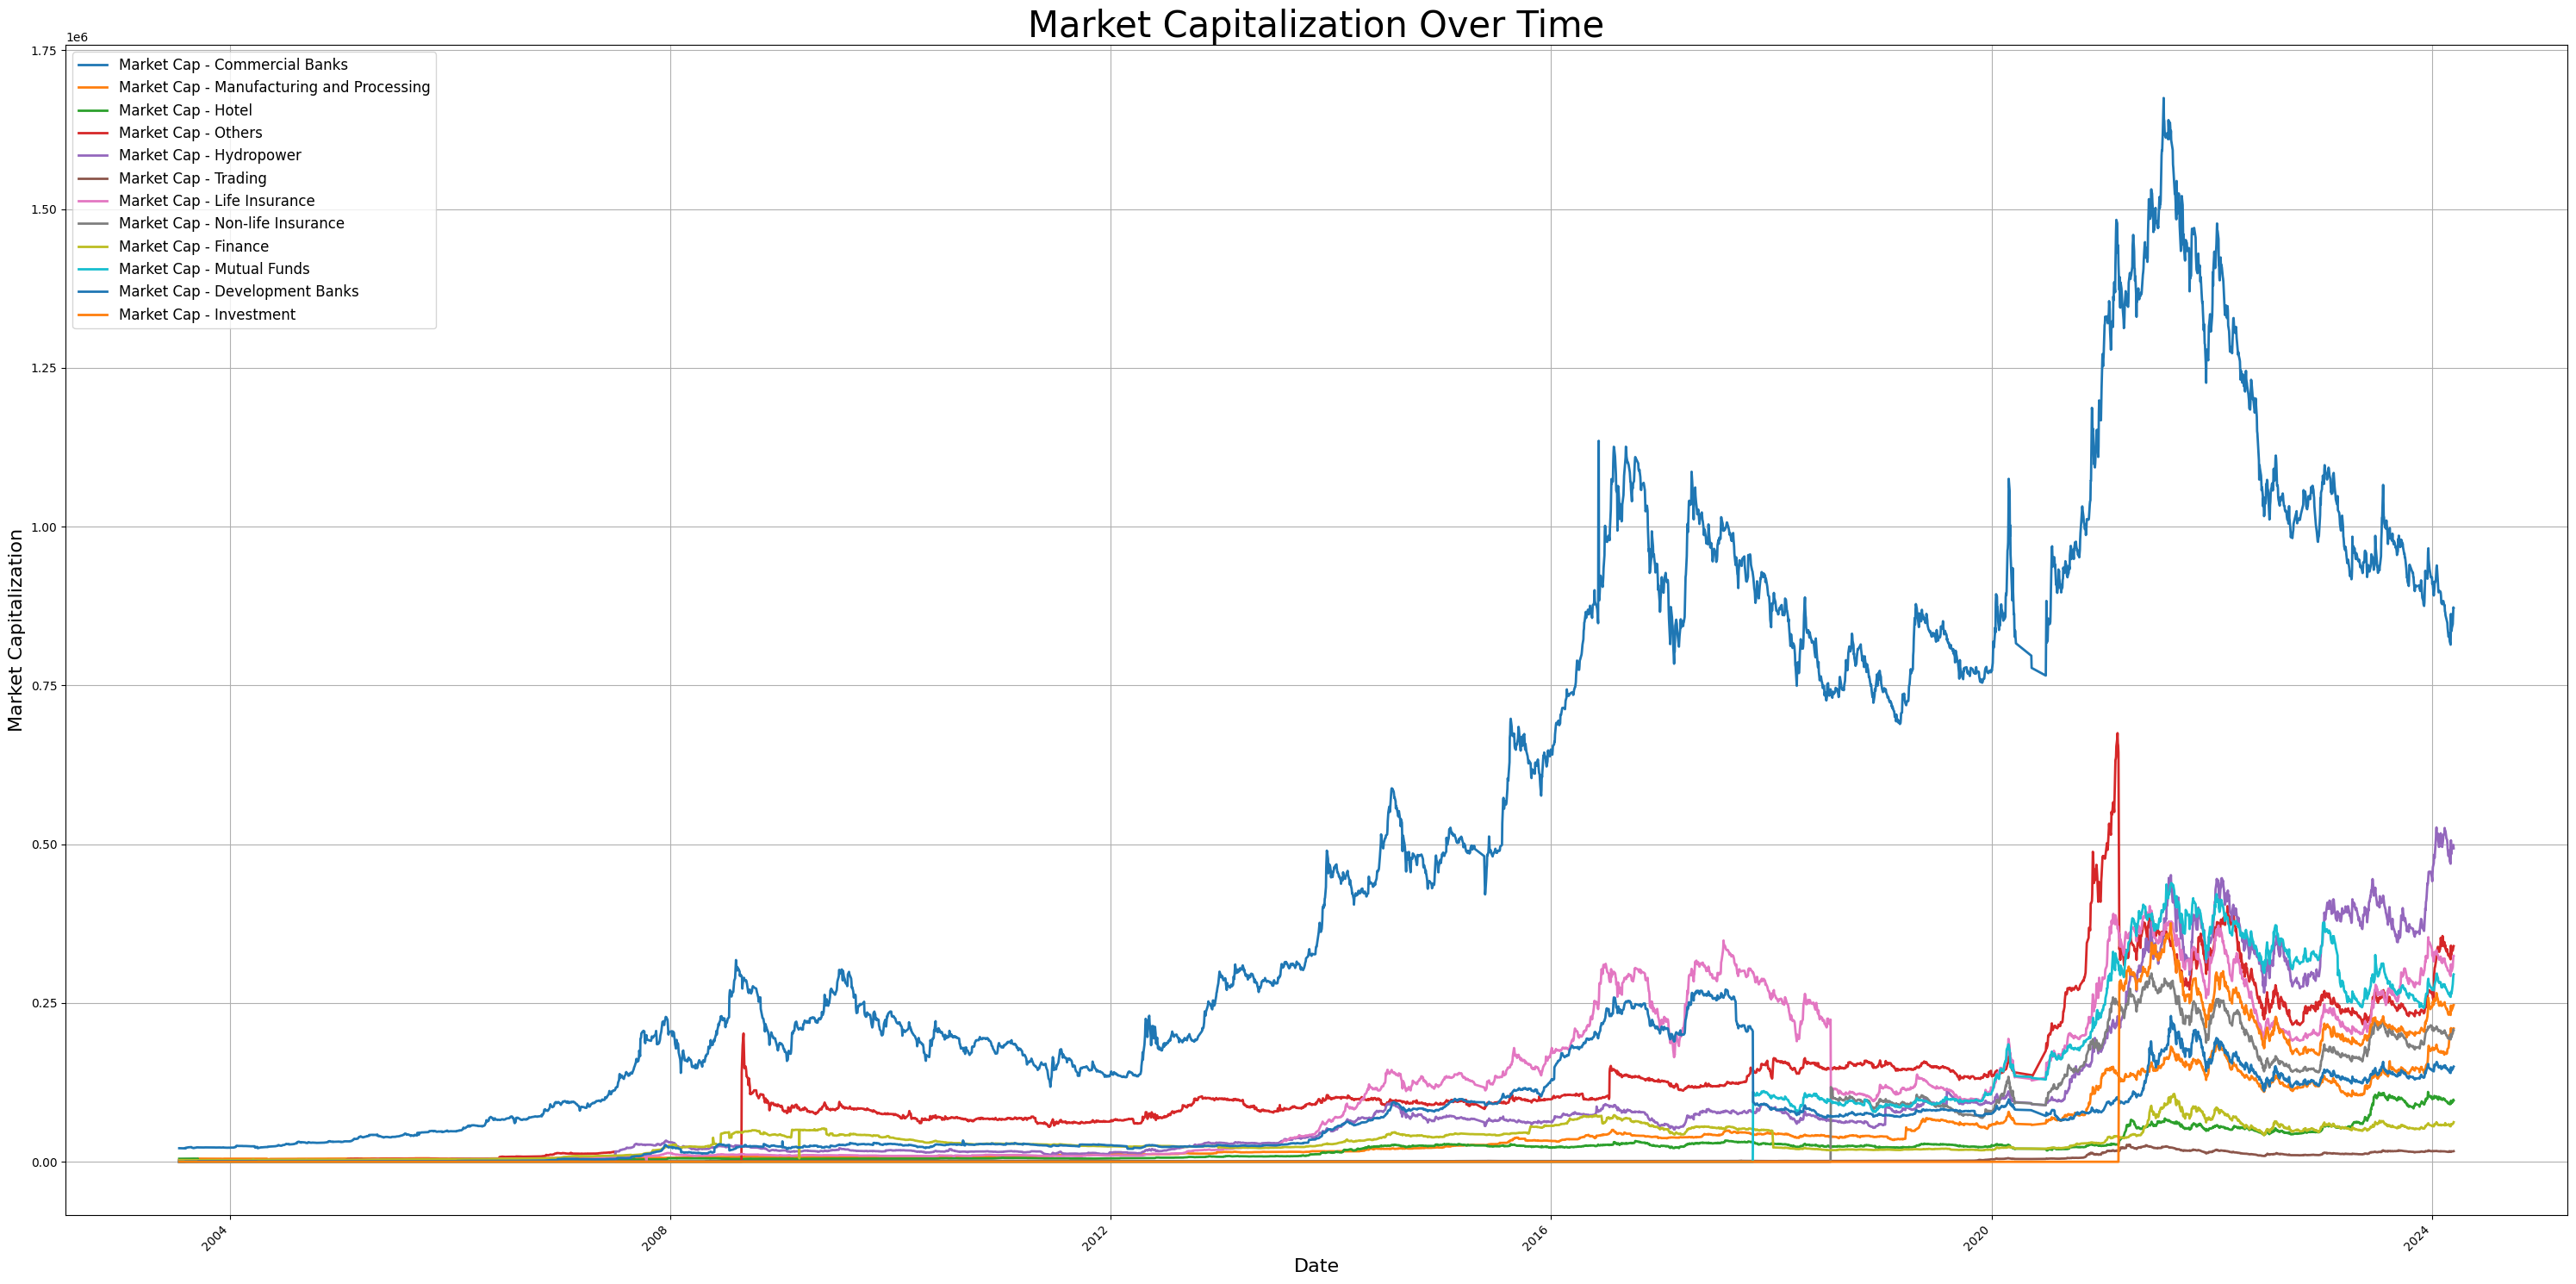

In [23]:
plt.figure(figsize=(30, 15))
market_cap_columns = [col for col in df.columns if col.startswith('M_')]

# Iterating over columns starting with 'M_'
for column in market_cap_columns:
    # Plotting each column
    plt.plot(df['Date/Month'], df[column], label=abbreviation_to_fullname.get(column, column), linewidth=2)

# Customizing the plot for better readability
plt.xlabel('Date', fontsize=16)
plt.ylabel('Market Capitalization', fontsize=16)
plt.title('Market Capitalization Over Time', fontsize=30)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Showing the plot
plt.show()

As we can see, Commercials bank Have A massive domination over market capitalization. The differnce is massive. as seen in nepse indiex too Life insurance also spikes after disasters like earthquake and pandemic as seen by the magenta line


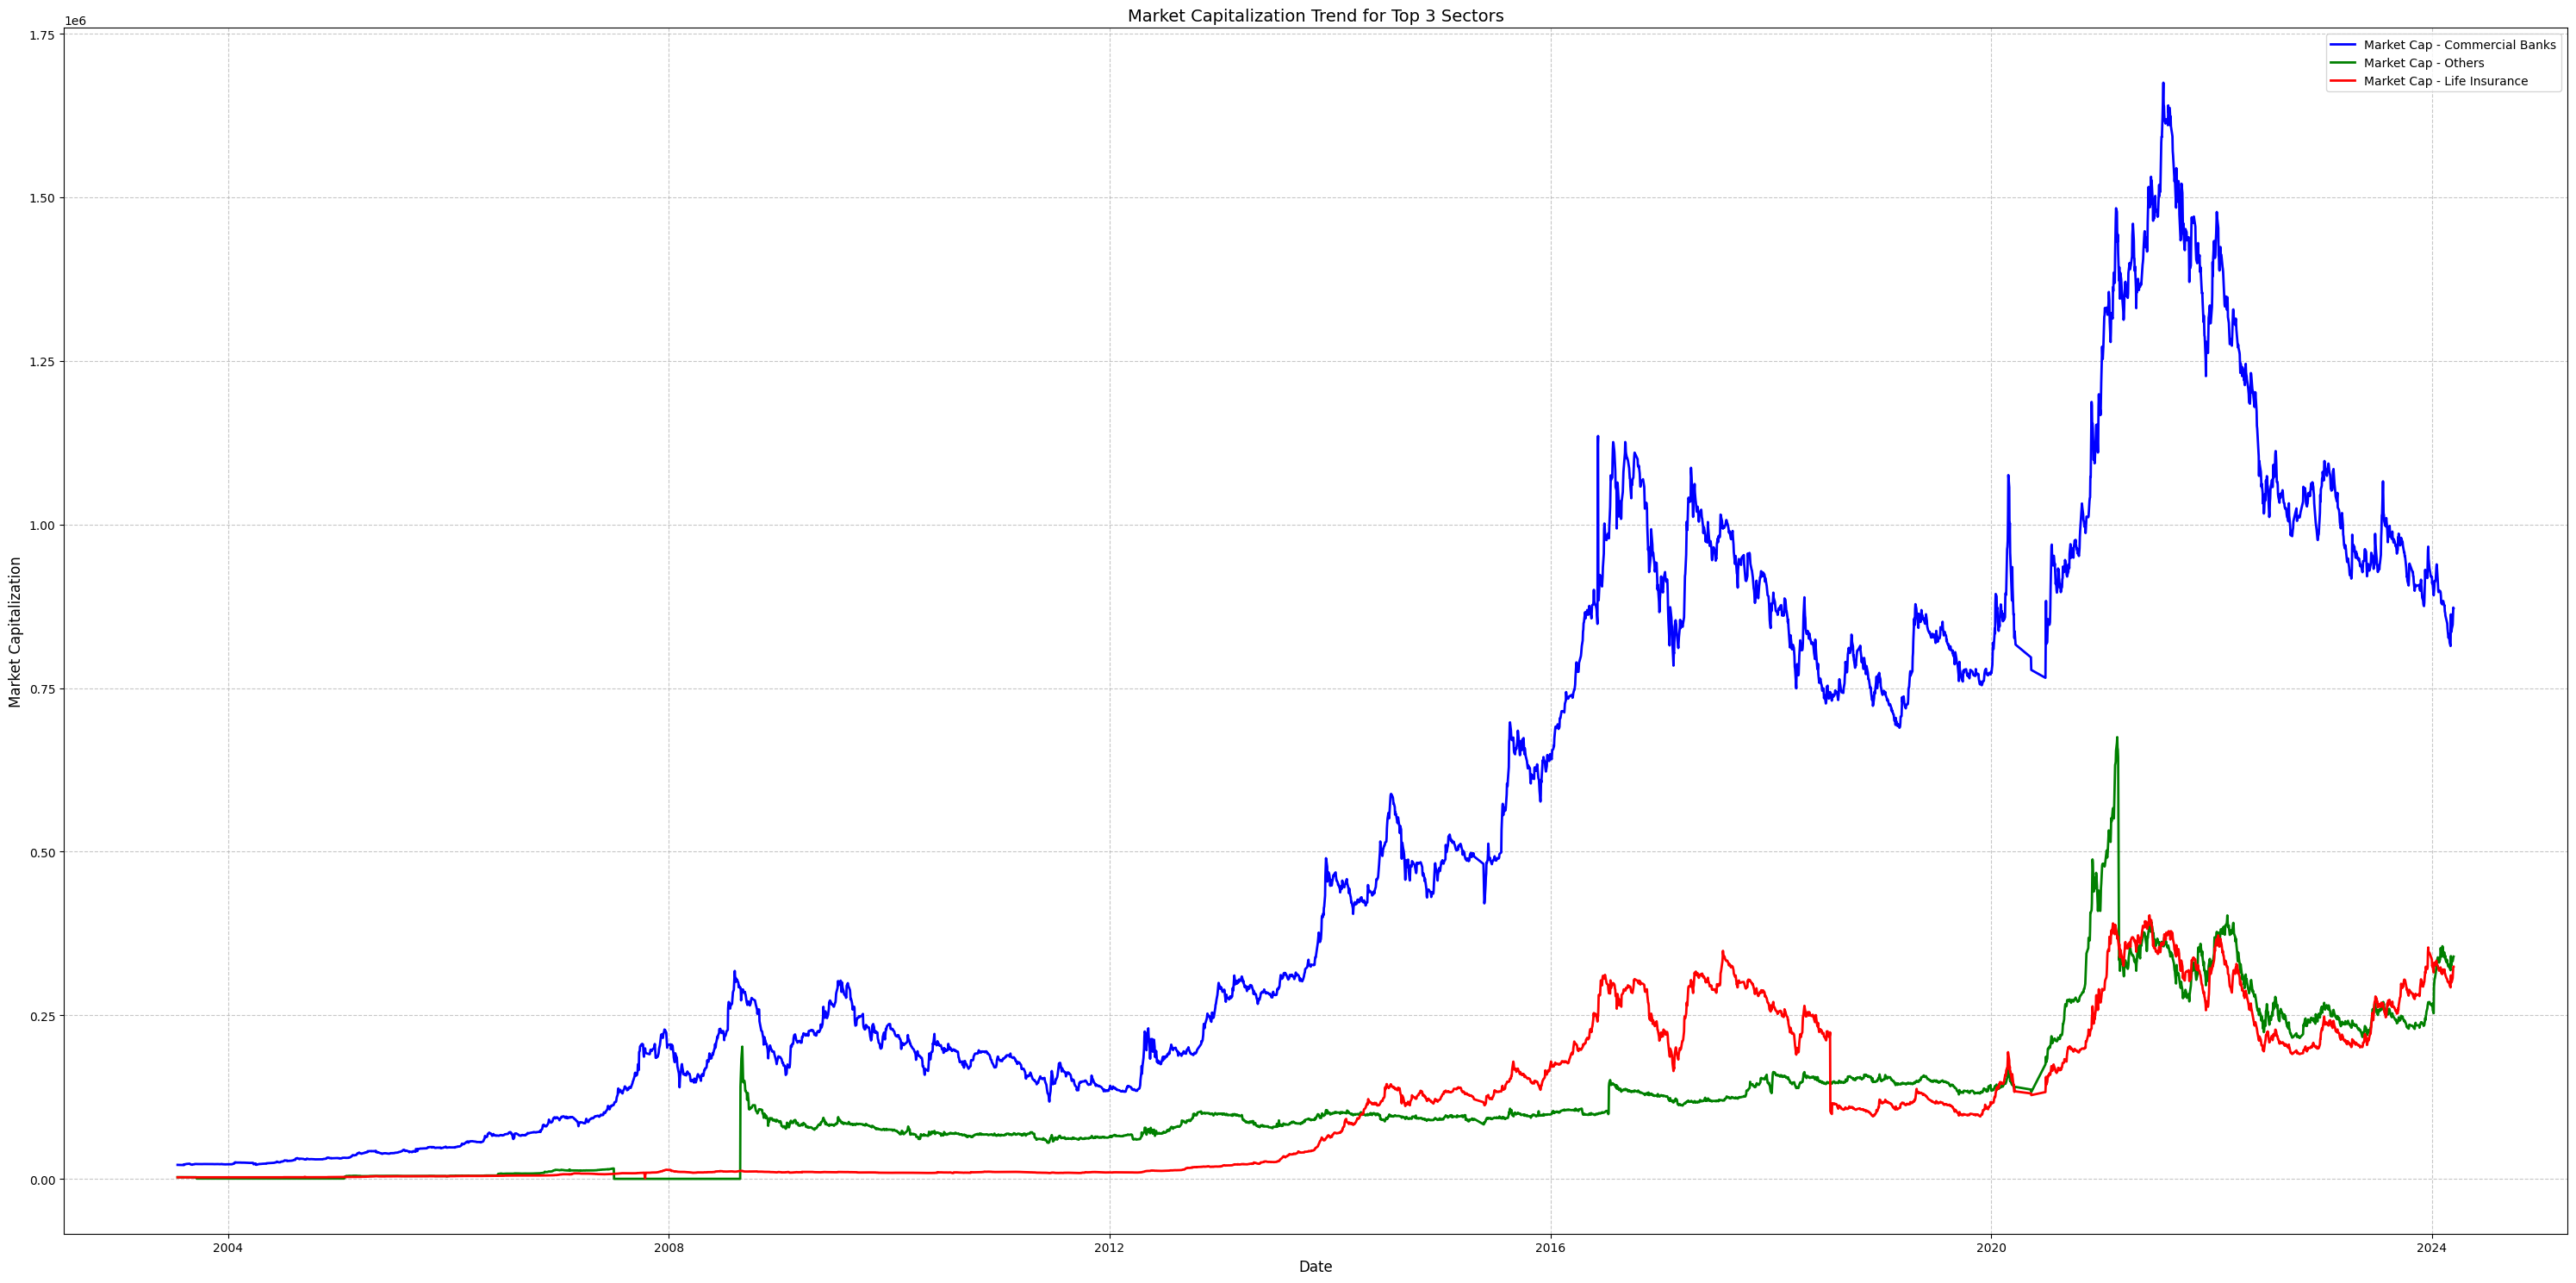

In [24]:
# Calculateing the average market capitalization for each sector
average_market_cap = df[market_cap_columns].mean().sort_values(ascending=False)

# Identifying the top 3 sectors with the highest average market capitalization
top_3_sectors = average_market_cap.head(3).index

# Plotting market capitalization for the top 3 sectors over time
plt.figure(figsize=(30, 15))
colors = ['blue', 'green', 'red'] 

for i, sector in enumerate(top_3_sectors):
    plt.plot(df['Date/Month'], df[sector], label=abbreviation_to_fullname.get(sector, sector), color=colors[i], linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Market Capitalization', fontsize=12)
plt.title('Market Capitalization Trend for Top 3 Sectors', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

We See Non-Life Insurance spring up at 2018. This is because it wasn't listed before said date. 

### 2.3: Pie Charts

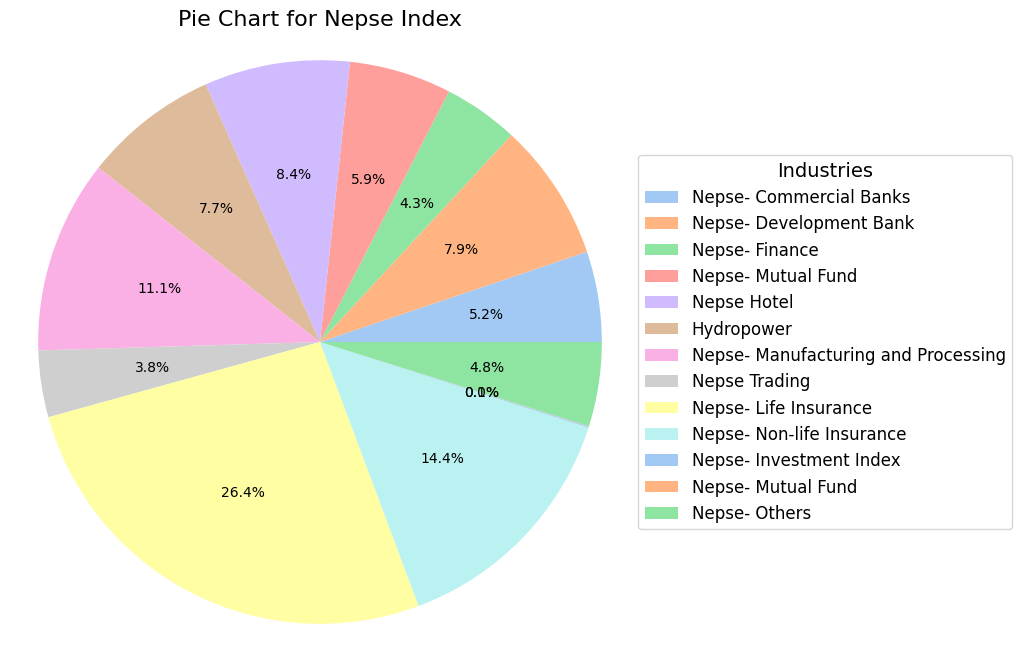

In [25]:
# Filtering columns with initials 'N' and 'M'
df_N = df.filter(regex='^N_')
df_M = df.filter(regex='^M_')

# Calculating the sum of each set of columns
sum_N = df_N.sum()
sum_M = df_M.sum()

# Defining a minimal and aesthetic color palette
colors = sns.color_palette("pastel")

# Creating pie chart for 'N' columns
plt.figure(figsize=(8, 8))
plt.title('Pie Chart for Nepse Index', fontsize=16)
plt.pie(sum_N, labels=None, autopct='%1.1f%%', colors=colors)
plt.legend(title="Industries", labels=[abbreviation_to_fullname.get(col, col) for col in sum_N.index], loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=14)
plt.axis('equal')
plt.show()

More than One Fourth of the Nepse Index has been dominated by Life insurance over the last two decades. The 0.01% next to Non Life Insurance is for Mutual Funds

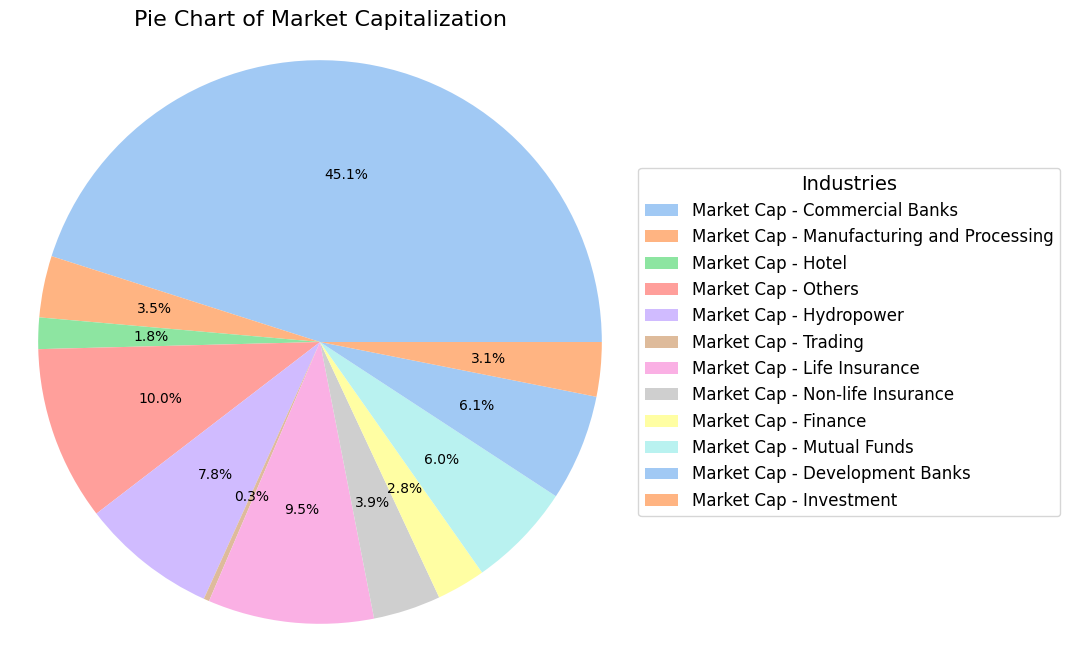

In [26]:
# Defining a minimal and aesthetic color palette
colors = sns.color_palette("pastel")

# Creating pie chart for 'M' columns
plt.figure(figsize=(8, 8))
plt.title('Pie Chart of Market Capitalization', fontsize=16)
plt.pie(sum_M, labels=None, autopct='%1.1f%%', colors=colors)
plt.legend(title="Industries", labels=[abbreviation_to_fullname.get(col, col) for col in sum_M.index], loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=14)
plt.axis('equal')
plt.show()

As we can see just as predicted by the line plot, commercial banks are the undisputed juggernauts in Market Capitalization, dominating almost half of the whole competition over 20 years.

### 2.4: Bar Charts

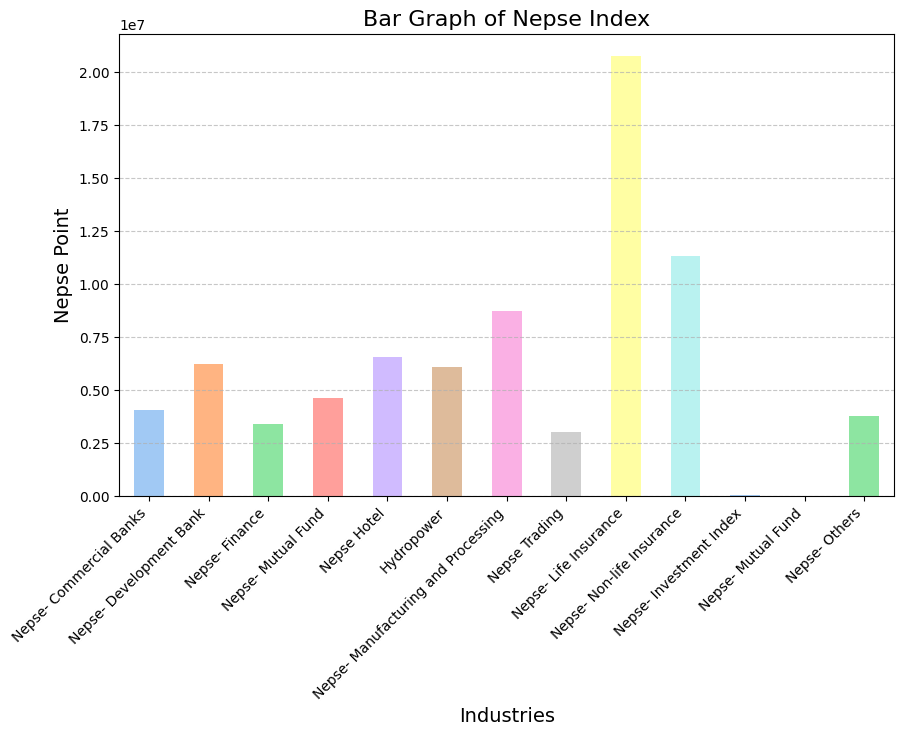

In [27]:
# Plotting the bar graph for Nepse Index
plt.figure(figsize=(10, 6))
sum_N.plot(kind='bar', color=colors)
plt.title('Bar Graph of Nepse Index', fontsize=16)
plt.xlabel('Industries', fontsize=14)
plt.ylabel('Nepse Point', fontsize=14)
plt.xticks(range(len(sum_N.index)), [abbreviation_to_fullname.get(abbrev, abbrev) for abbrev in sum_N.index], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Investment Index and Multual funds are almost negligible, while life and non life insurance continue to Dominate.

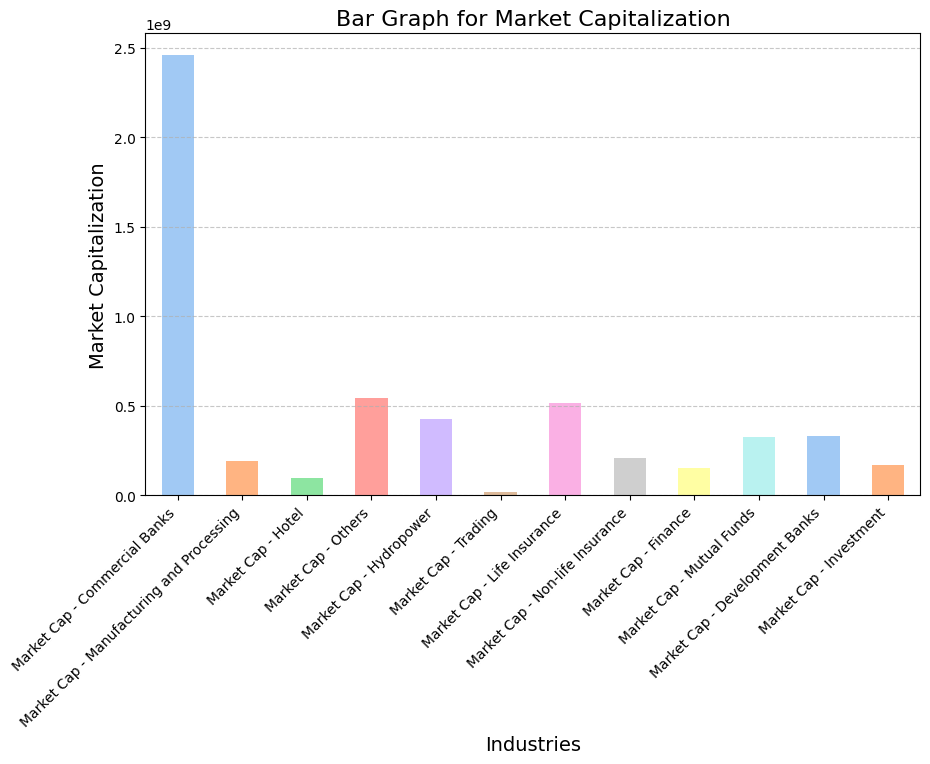

In [28]:
# Plotting the bar graph for Market Capitalization
plt.figure(figsize=(10, 6))
sum_M.plot(kind='bar', color=colors)
plt.title('Bar Graph for Market Capitalization', fontsize=16)
plt.xlabel('Industries', fontsize=14)
plt.ylabel('Market Capitalization', fontsize=14)
plt.xticks(range(len(sum_M.index)), [abbreviation_to_fullname.get(abbrev, abbrev) for abbrev in sum_M.index], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2.5: Correlation Matrix

In [29]:
# Computing the correlation matrix
correlation_matrix = df.corr()

# Selecting NEPSE index columns and market capitalization columns
nepse_columns = [col for col in df.columns if col.startswith('N_')]
market_cap_columns = [col for col in df.columns if col.startswith('M_')]

# Extracting the correlation between NEPSE indices and market capitalization
correlation_nepse_market_cap = correlation_matrix.loc[nepse_columns, market_cap_columns]

correlation_nepse_market_cap


M_C      M_MP       M_H       M_O   M_Hydro       M_T      M_LI  \
N_CB     0.955713  0.786809  0.721255  0.799786  0.714866  0.662953  0.912485   
N_D      0.871241  0.948106  0.875900  0.840405  0.941098  0.873867  0.832426   
N_F      0.765693  0.876883  0.802354  0.767605  0.898292  0.858163  0.724976   
N_MF     0.804025  0.950783  0.800166  0.876921  0.917320  0.927926  0.732130   
N_H      0.850895  0.889373  0.987322  0.787541  0.895716  0.766541  0.876644   
N_Hydro  0.836466  0.715760  0.760768  0.722076  0.737787  0.606715  0.833276   
N_MP     0.919239  0.989093  0.897218  0.924945  0.945460  0.902291  0.887981   
N_T      0.725706  0.929612  0.812274  0.848740  0.915206  0.999982  0.706764   
N_LI     0.969925  0.920426  0.831259  0.914033  0.845391  0.837412  0.956025   
N_NI     0.781205  0.940190  0.800654  0.880812  0.895527  0.933393  0.695191   
N_I      0.654761  0.878041  0.807410  0.712827  0.918498  0.936878  0.641412   
N_Muf    0.688393  0.931393  0.833963  0.819799  0.944247  0.946712  0.672443   
N_O      0.819267  0.905355  0.787104  0.899123  0.888904  0.905317  0.771878   

             M_NI       M_F      M_MF       M_D       M_I  
N_CB     0.695725  0.756351  0.709337  0.842145  0.594674  
N_D      0.886508  0.729580  0.920047  0.707868  0.873678  
N_F      0.829259  0.768765  0.868318  0.611901  0.879507  
N_MF     0.963513  0.509882  0.998557  0.479057  0.888318  
N_H      0.773404  0.686988  0.773265  0.764078  0.743961  
N_Hydro  0.573466  0.864139  0.611252  0.808181  0.607809  
N_MP     0.922613  0.677894  0.941926  0.714220  0.852015  
N_T      0.943846  0.572065  0.936733  0.464156  0.934620  
N_LI     0.861144  0.687104  0.861597  0.788199  0.746686  
N_NI     0.999334  0.473849  0.958958  0.457616  0.855163  
N_I      0.868680  0.588403  0.903856  0.463911  0.998491  
N_Muf    0.917545  0.546915  0.935835  0.456270  0.915946  
N_O      0.875096  0.716126  0.886901  0.580003  0.849188

In [30]:
# Computing the correlation matrix for NEPSE indices
nepse_correlation_matrix = df[nepse_columns].corr()

nepse_correlation_matrix

N_CB       N_D       N_F      N_MF       N_H   N_Hydro      N_MP  \
N_CB     1.000000  0.849976  0.786049  0.718092  0.778315  0.844877  0.843199   
N_D      0.849976  1.000000  0.964123  0.915320  0.859204  0.759948  0.952309   
N_F      0.786049  0.964123  1.000000  0.857864  0.767095  0.739508  0.872266   
N_MF     0.718092  0.915320  0.857864  1.000000  0.771875  0.607907  0.941071   
N_H      0.778315  0.859204  0.767095  0.771875  1.000000  0.808503  0.897012   
N_Hydro  0.844877  0.759948  0.739508  0.607907  0.808503  1.000000  0.768720   
N_MP     0.843199  0.952309  0.872266  0.941071  0.897012  0.768720  1.000000   
N_T      0.660992  0.872922  0.857615  0.927419  0.764376  0.603711  0.900808   
N_LI     0.919657  0.900058  0.805513  0.868277  0.864789  0.795281  0.956074   
N_NI     0.694661  0.881664  0.820272  0.959818  0.773315  0.566852  0.918443   
N_I      0.596367  0.870523  0.875931  0.888464  0.741951  0.606848  0.851229   
N_Muf    0.614880  0.882360  0.855436  0.920618  0.774079  0.582358  0.892728   
N_O      0.813673  0.896730  0.896810  0.881108  0.773288  0.786749  0.907949   

              N_T      N_LI      N_NI       N_I     N_Muf       N_O  
N_CB     0.660992  0.919657  0.694661  0.596367  0.614880  0.813673  
N_D      0.872922  0.900058  0.881664  0.870523  0.882360  0.896730  
N_F      0.857615  0.805513  0.820272  0.875931  0.855436  0.896810  
N_MF     0.927419  0.868277  0.959818  0.888464  0.920618  0.881108  
N_H      0.764376  0.864789  0.773315  0.741951  0.774079  0.773288  
N_Hydro  0.603711  0.795281  0.566852  0.606848  0.582358  0.786749  
N_MP     0.900808  0.956074  0.918443  0.851229  0.892728  0.907949  
N_T      1.000000  0.835729  0.932975  0.937067  0.946710  0.904362  
N_LI     0.835729  1.000000  0.858048  0.749383  0.784957  0.867530  
N_NI     0.932975  0.858048  1.000000  0.856513  0.907181  0.865357  
N_I      0.937067  0.749383  0.856513  1.000000  0.914127  0.850561  
N_Muf    0.946710  0.784957  0.907181  0.914127  1.000000  0.865506  
N_O      0.904362  0.867530  0.865357  0.850561  0.865506  1.000000

In [31]:
markercap_correlation_matrix= df[market_cap_columns].corr()
markercap_correlation_matrix

M_C      M_MP       M_H       M_O   M_Hydro       M_T      M_LI  \
M_C      1.000000  0.866046  0.795827  0.884737  0.786672  0.728305  0.950371   
M_MP     0.866046  1.000000  0.906391  0.911114  0.965001  0.930700  0.837650   
M_H      0.795827  0.906391  1.000000  0.770367  0.932694  0.813913  0.824861   
M_O      0.884737  0.911114  0.770367  1.000000  0.836738  0.850880  0.826922   
M_Hydro  0.786672  0.965001  0.932694  0.836738  1.000000  0.916137  0.773421   
M_T      0.728305  0.930700  0.813913  0.850880  0.916137  1.000000  0.708967   
M_LI     0.950371  0.837650  0.824861  0.826922  0.773421  0.708967  1.000000   
M_NI     0.780490  0.944734  0.802899  0.884076  0.902535  0.944210  0.699783   
M_F      0.727264  0.636586  0.666670  0.638098  0.661575  0.574961  0.729835   
M_MF     0.793538  0.954477  0.806757  0.871849  0.929087  0.937164  0.725324   
M_D      0.848794  0.645089  0.699569  0.613835  0.610602  0.467006  0.886770   
M_I      0.653396  0.879636  0.810239  0.710116  0.921369  0.934438  0.640238   

             M_NI       M_F      M_MF       M_D       M_I  
M_C      0.780490  0.727264  0.793538  0.848794  0.653396  
M_MP     0.944734  0.636586  0.954477  0.645089  0.879636  
M_H      0.802899  0.666670  0.806757  0.699569  0.810239  
M_O      0.884076  0.638098  0.871849  0.613835  0.710116  
M_Hydro  0.902535  0.661575  0.929087  0.610602  0.921369  
M_T      0.944210  0.574961  0.937164  0.467006  0.934438  
M_LI     0.699783  0.729835  0.725324  0.886770  0.640238  
M_NI     1.000000  0.485095  0.963799  0.460237  0.867271  
M_F      0.485095  1.000000  0.523078  0.803201  0.591271  
M_MF     0.963799  0.523078  1.000000  0.481434  0.904000  
M_D      0.460237  0.803201  0.481434  1.000000  0.465977  
M_I      0.867271  0.591271  0.904000  0.465977  1.000000

### 2.6: Heatmaps

#### 2.6.1 Nepse Indices Vs Market Capitalization


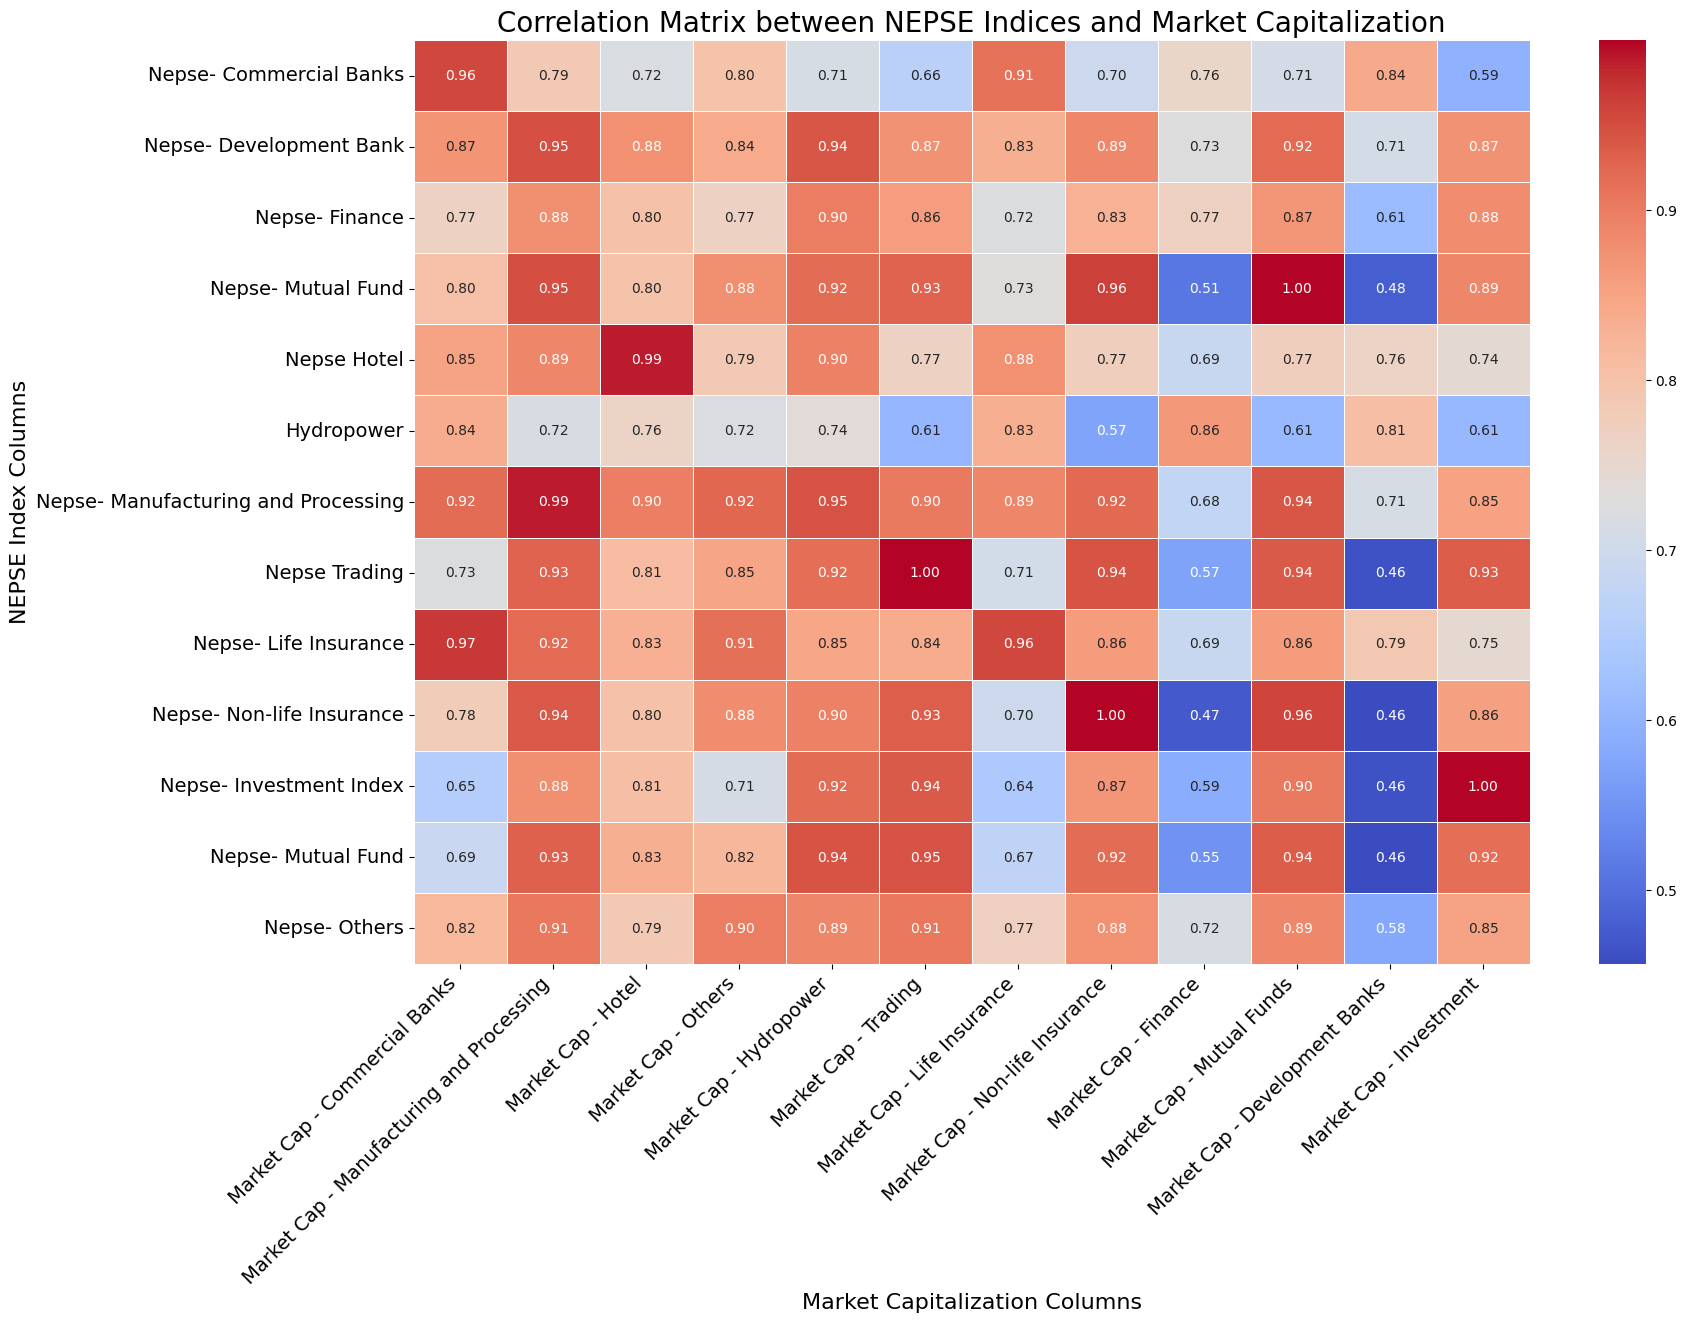

In [32]:
# Ensuring all columns except the date are numeric
numeric_data = df.select_dtypes(include=[float, int])

# Computing the correlation matrix
correlation_matrix = numeric_data.corr()

# Selecting NEPSE index columns and market capitalization columns
nepse_columns = [col for col in numeric_data.columns if col.startswith('N_')]
market_cap_columns = [col for col in numeric_data.columns if col.startswith('M_')]

# Extracting the correlation between NEPSE indices and market capitalization
correlation_nepse_market_cap = correlation_matrix.loc[nepse_columns, market_cap_columns]

# Replacing the column names with full names
correlation_nepse_market_cap.index = [abbreviation_to_fullname.get(col, col) for col in correlation_nepse_market_cap.index]
correlation_nepse_market_cap.columns = [abbreviation_to_fullname.get(col, col) for col in correlation_nepse_market_cap.columns]

# Plotting the heatmap for the correlation matrix between NEPSE indices and market capitalization
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_nepse_market_cap, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix between NEPSE Indices and Market Capitalization', fontsize=20)
plt.xlabel('Market Capitalization Columns', fontsize=16)
plt.ylabel('NEPSE Index Columns', fontsize=16)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.show()

This Heatmap shows the correlation between Nepse Metrics and Market Capitalization Metrics. Since X and Y are not the same, the diagonal isn't 1.

#### 2.6.2: Nepse Indices

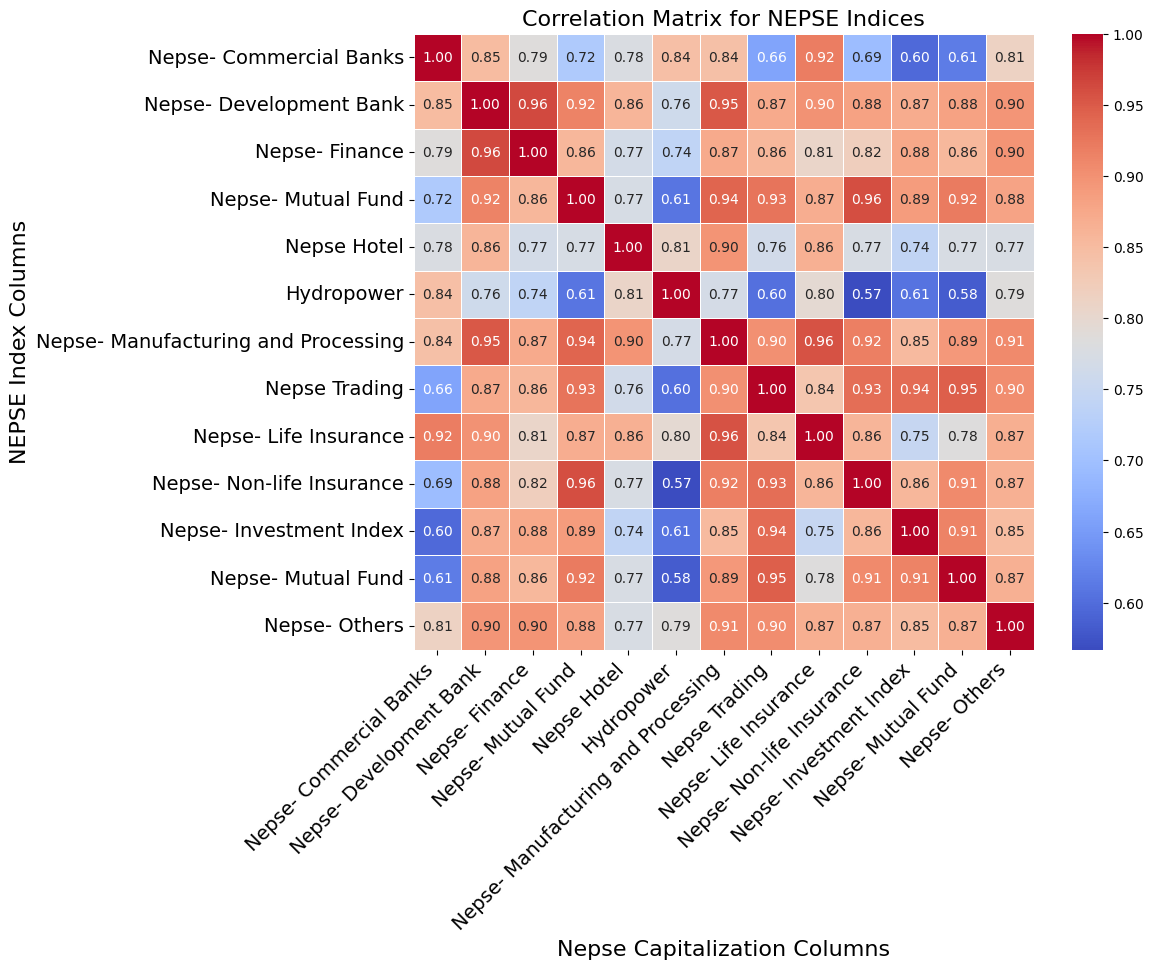

In [33]:

# Selecting NEPSE index columns
nepse_columns = [col for col in numeric_data.columns if col.startswith('N_')]

# Filtering data for NEPSE metrics
nepse_data = numeric_data[nepse_columns]

# Computing the correlation matrix for NEPSE metrics
correlation_nepse = nepse_data.corr()

# Replacing the column names with full names 
if abbreviation_to_fullname:
    correlation_nepse.index = [abbreviation_to_fullname.get(col, col) for col in correlation_nepse.index]
    correlation_nepse.columns = [abbreviation_to_fullname.get(col, col) for col in correlation_nepse.columns]

# Plotting the heatmap for the NEPSE correlation matrix 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_nepse, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for NEPSE Indices', fontsize=16)
plt.xlabel('Nepse Capitalization Columns', fontsize=16)
plt.ylabel('NEPSE Index Columns', fontsize=16)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.show()

This Heatmap is for Nepse indexes against themselves.

#### 2.6.3: Market Capitalization

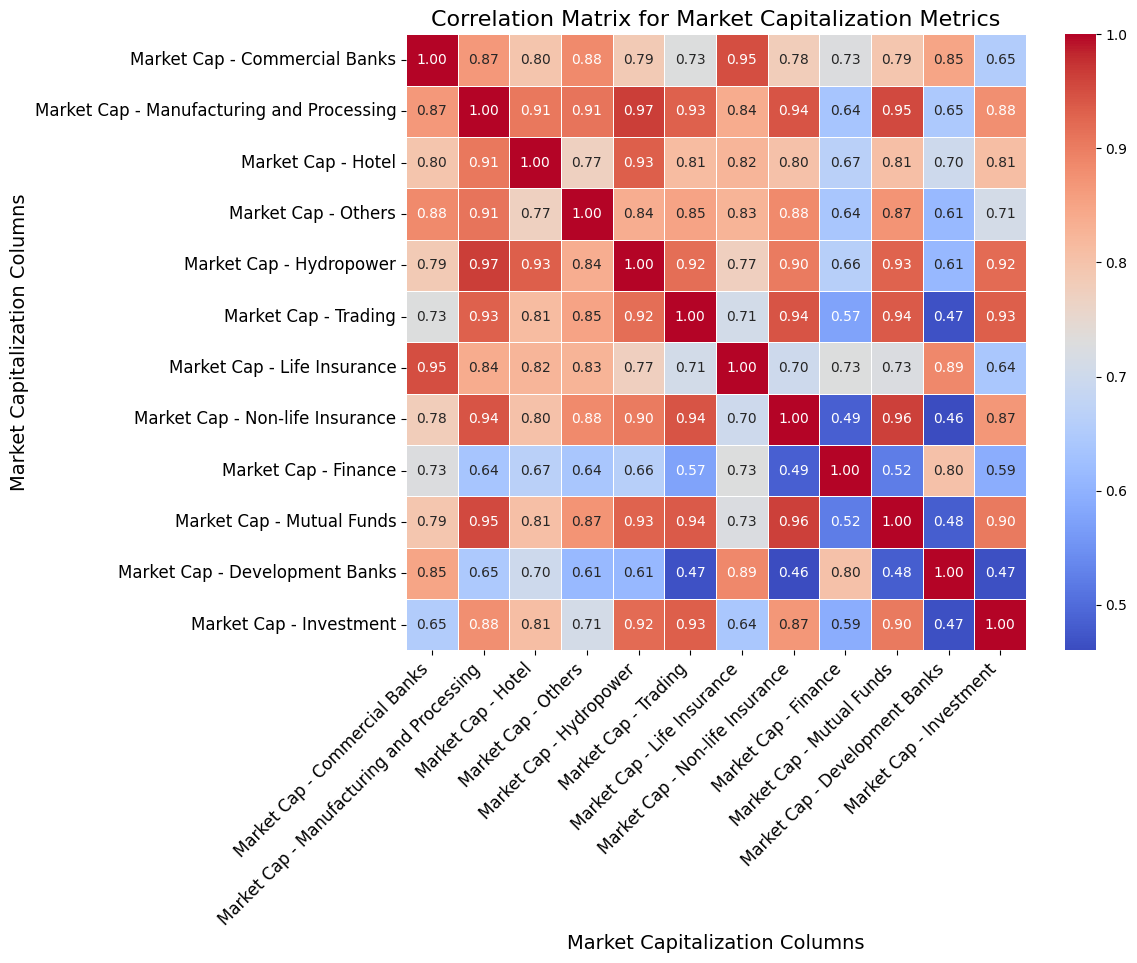

In [34]:
# Converting the Date/Month column to datetime format
df['Date/Month'] = pd.to_datetime(df['Date/Month'])

# Selecting Market Capitalization columns
market_cap_columns = [col for col in numeric_data.columns if col.startswith('M_')]

# Filter data for Market Capitalization metrics
market_cap_data = numeric_data[market_cap_columns]

# Computing the correlation matrix for Market Capitalization metrics
correlation_market_cap = market_cap_data.corr()


# Replacing the column names with full names (if applicable)
if abbreviation_to_fullname:
    correlation_market_cap.index = [abbreviation_to_fullname.get(col, col) for col in correlation_market_cap.index]
    correlation_market_cap.columns = [abbreviation_to_fullname.get(col, col) for col in correlation_market_cap.columns]

# Plotting the heatmap for the Market Capitalization correlation matrix
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_market_cap, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Market Capitalization Metrics', fontsize=16)
plt.xlabel('Market Capitalization Columns', fontsize=14)
plt.ylabel('Market Capitalization Columns', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.show()

This one shows the correlation between the market capitalization metrics.

### 2.7 Scatter Plots

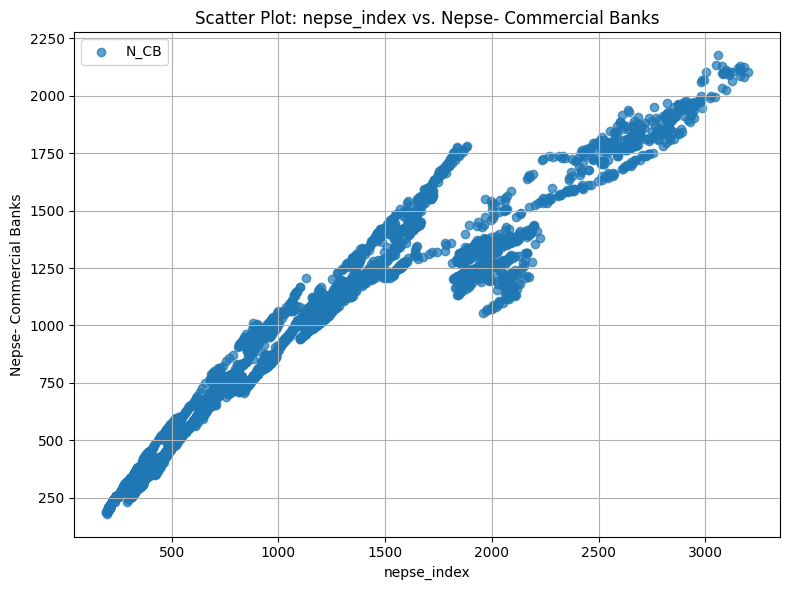

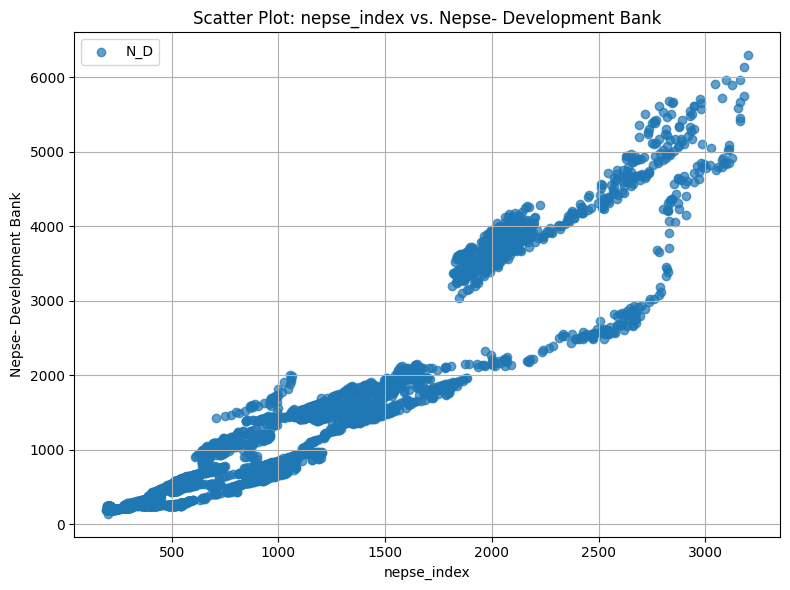

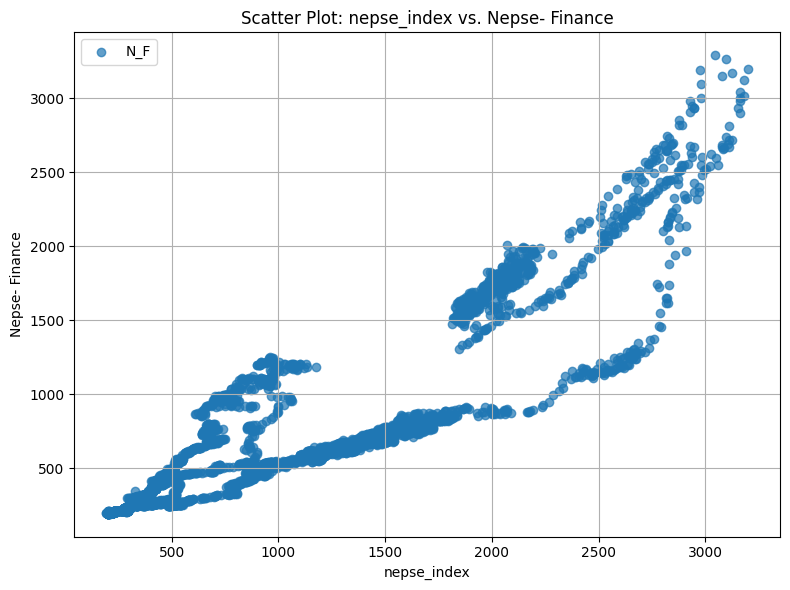

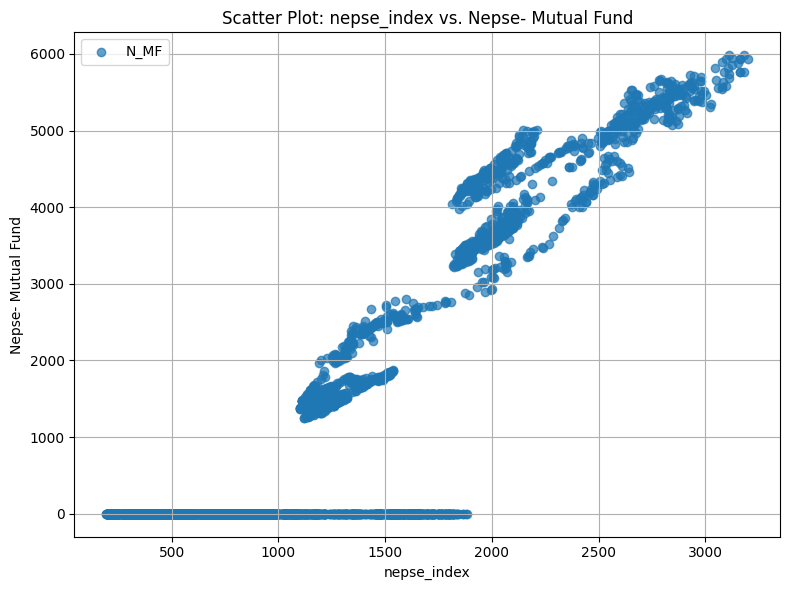

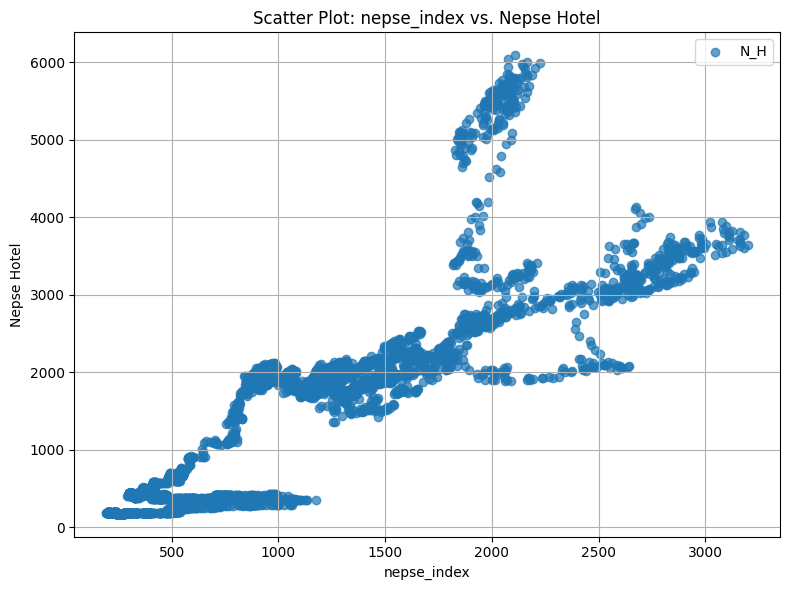

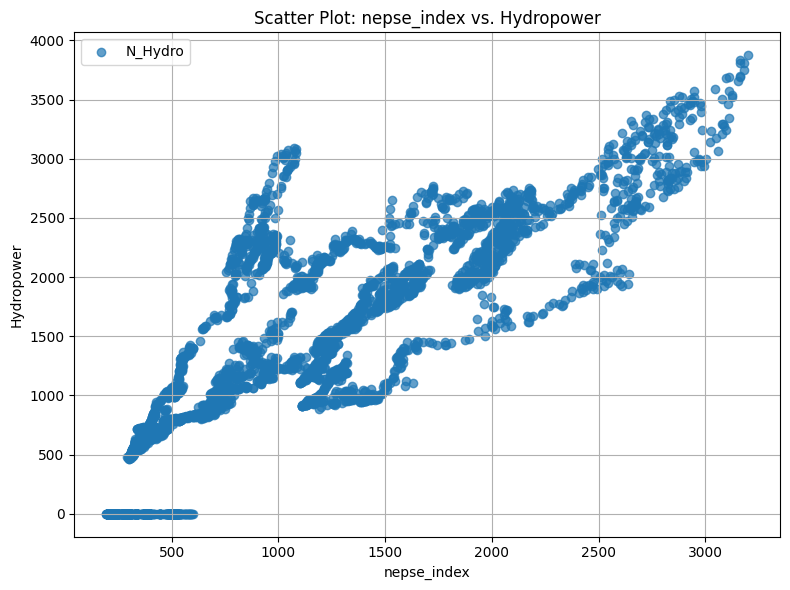

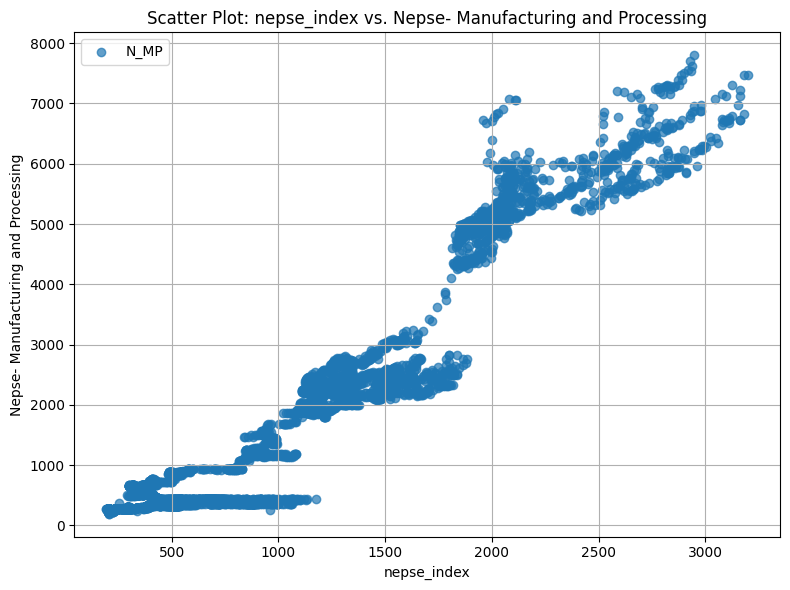

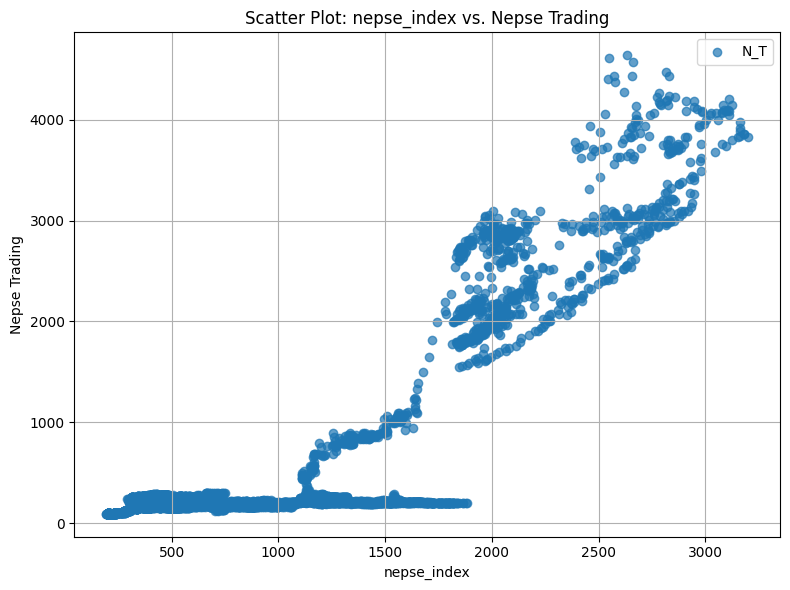

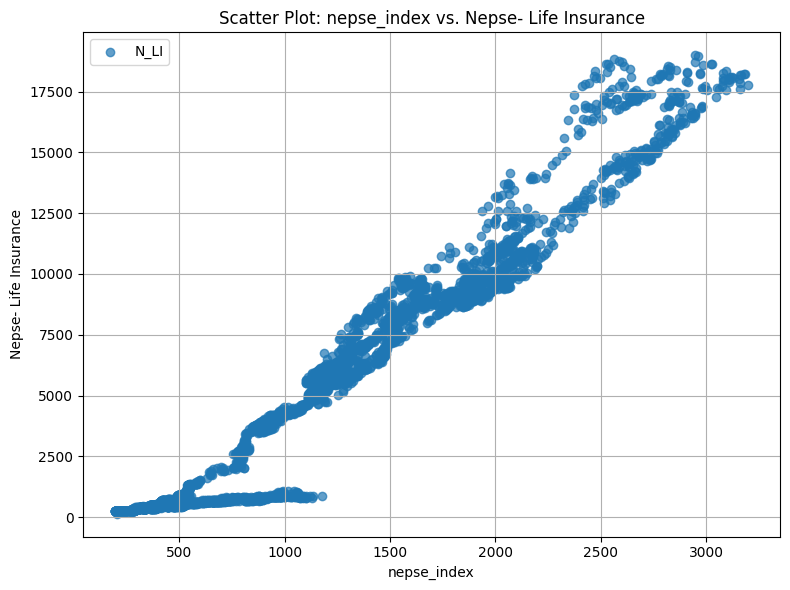

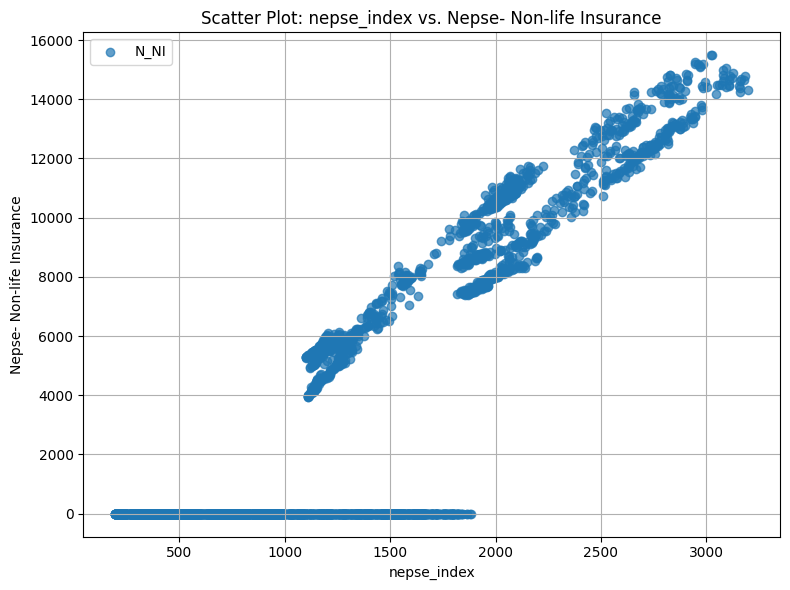

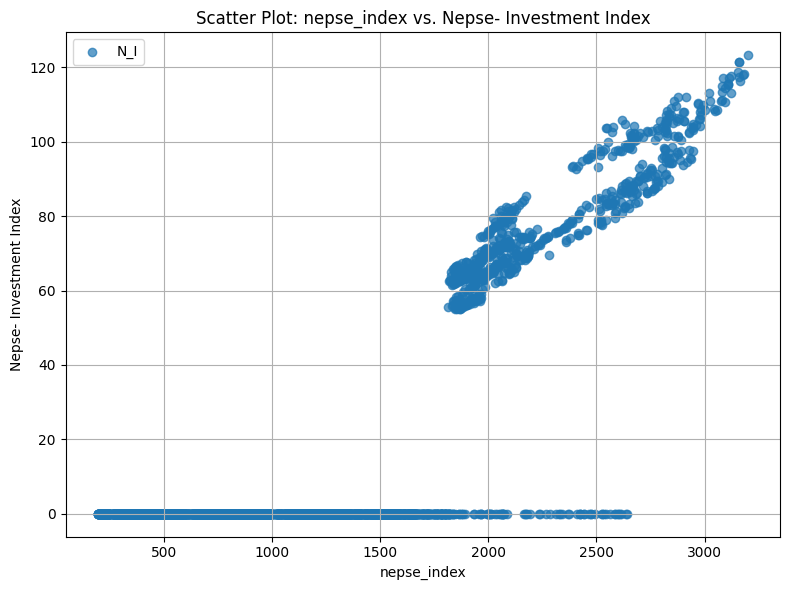

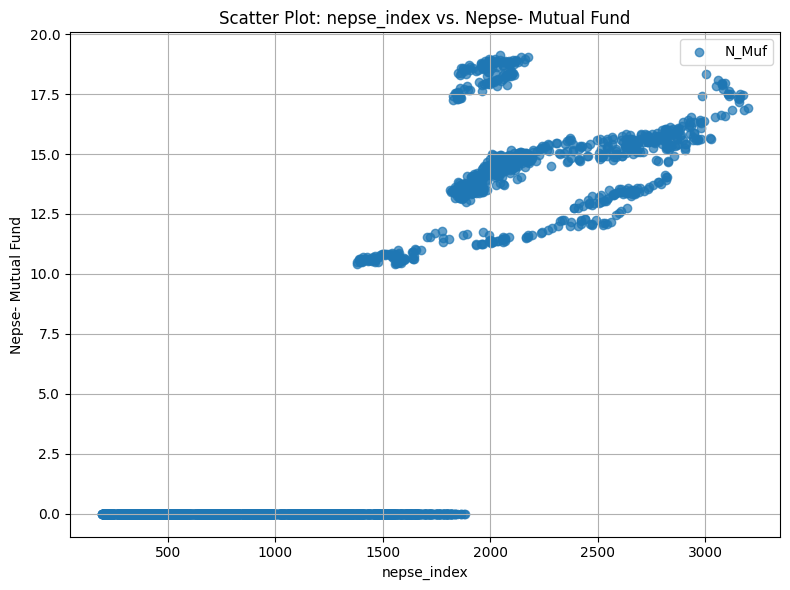

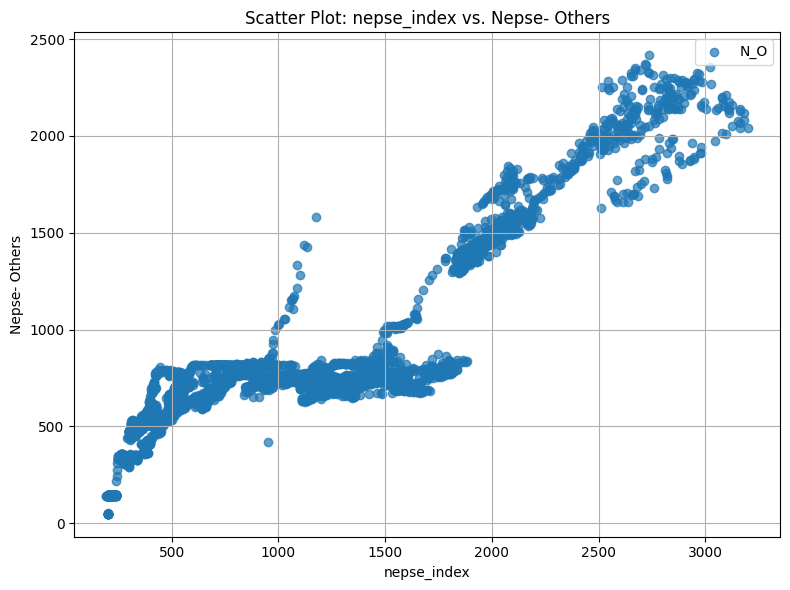

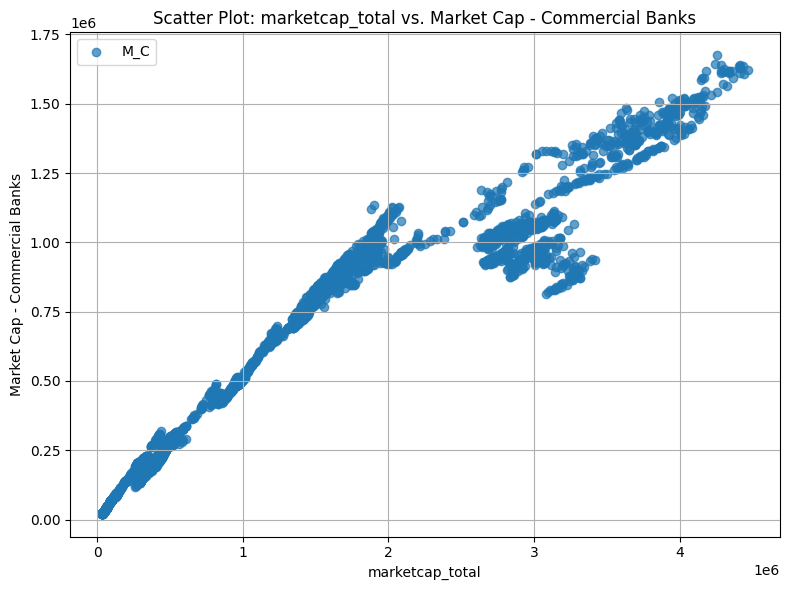

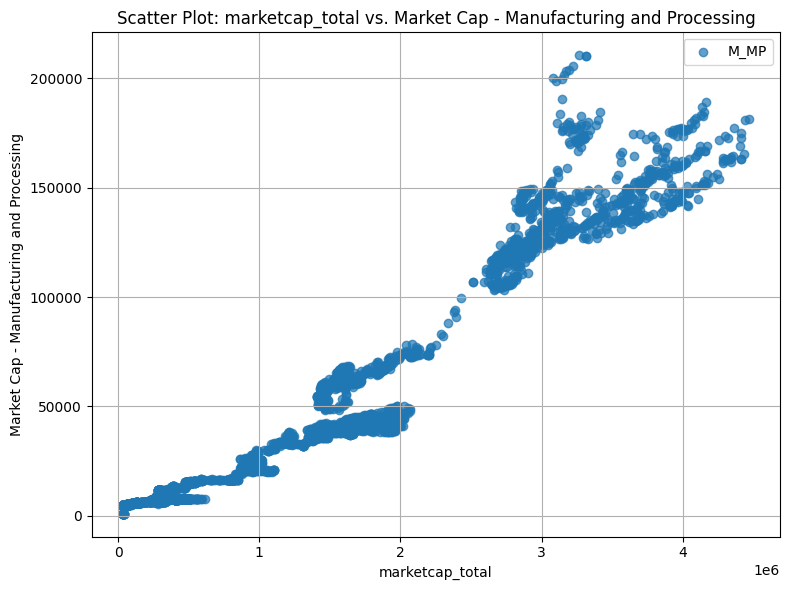

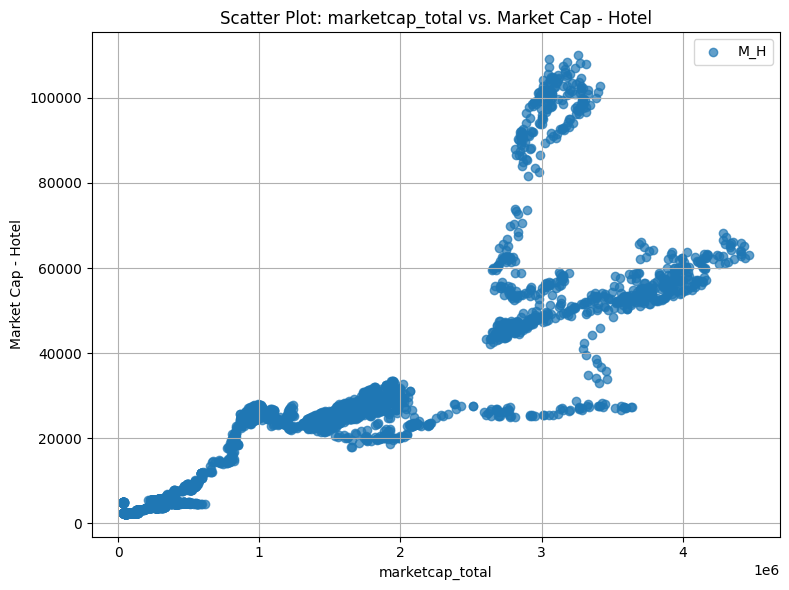

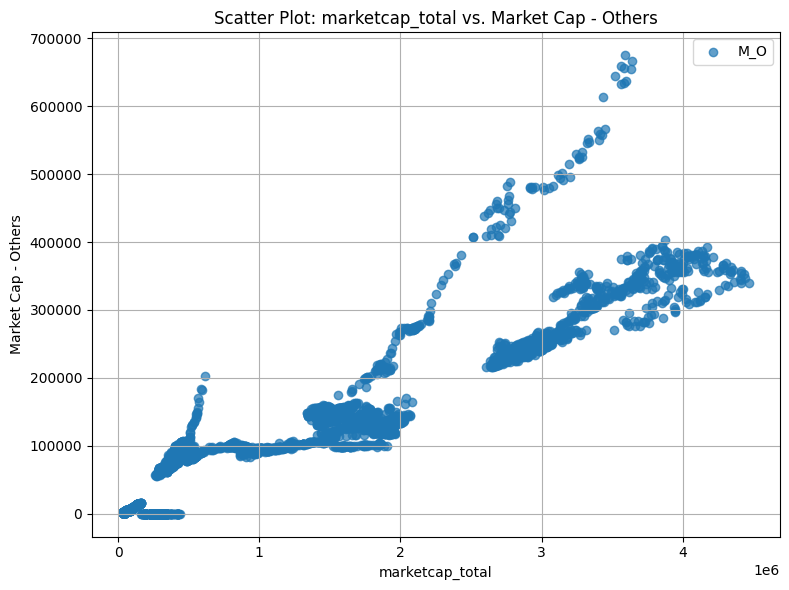

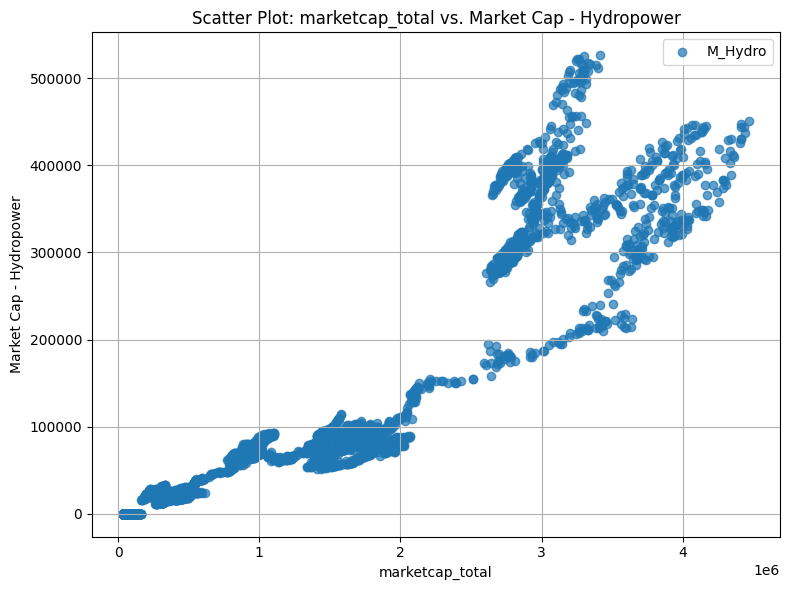

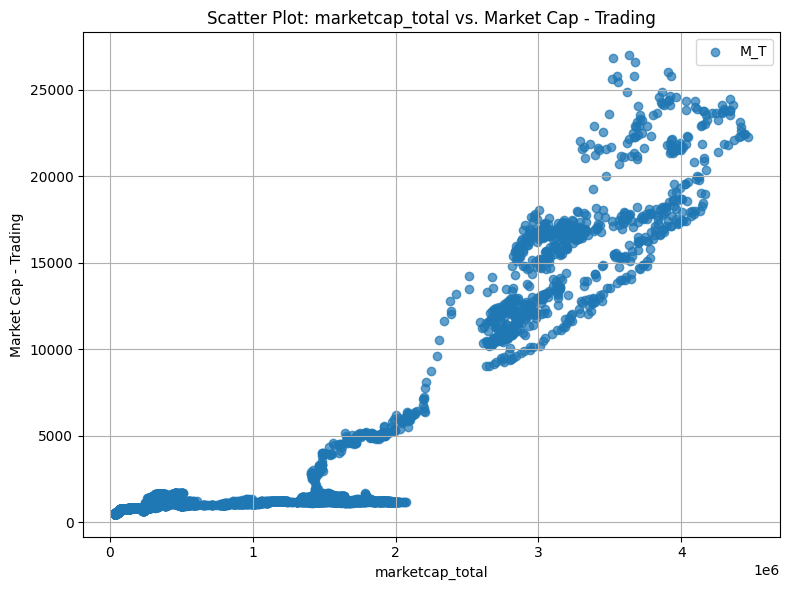

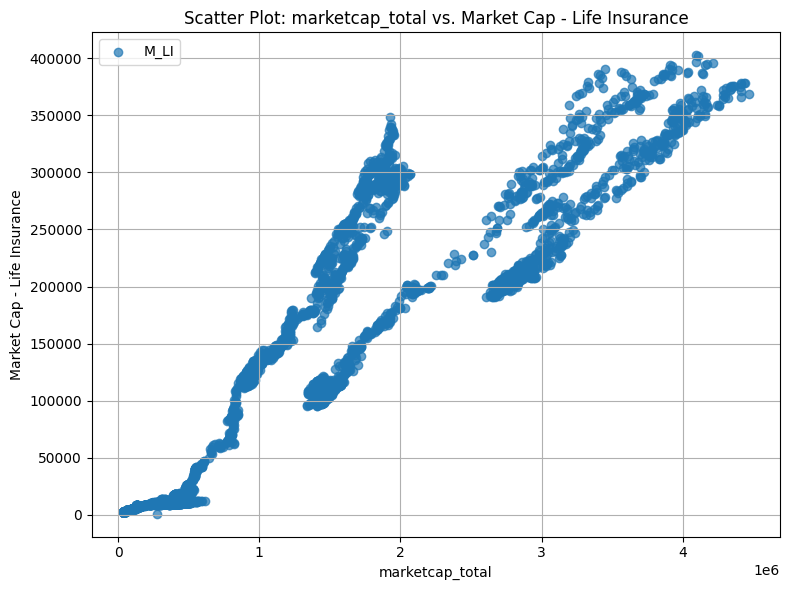

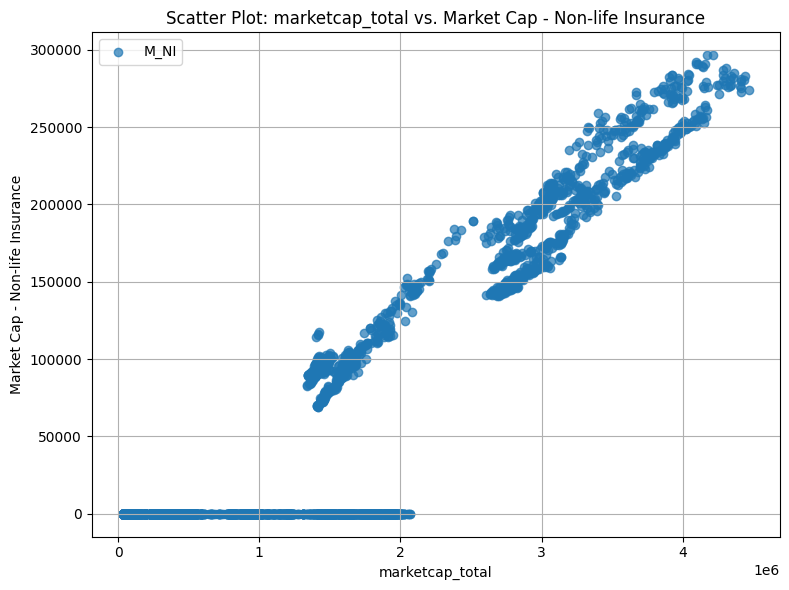

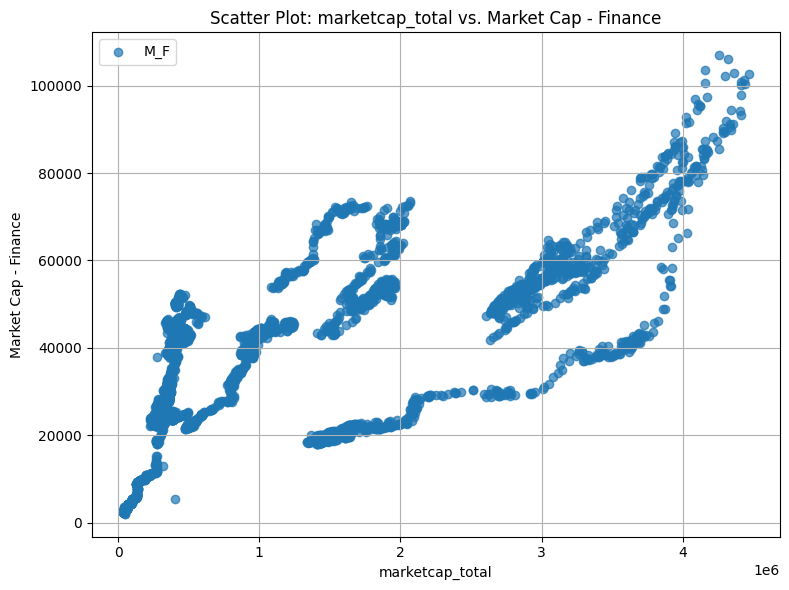

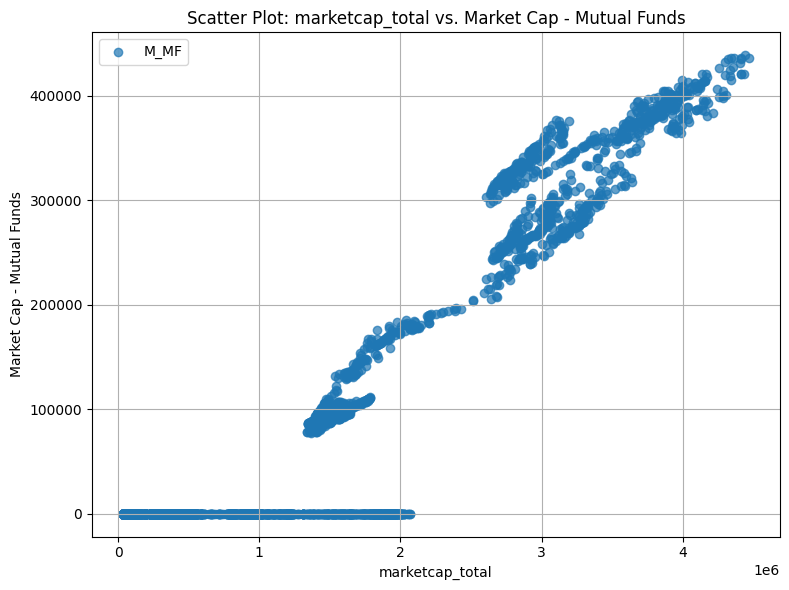

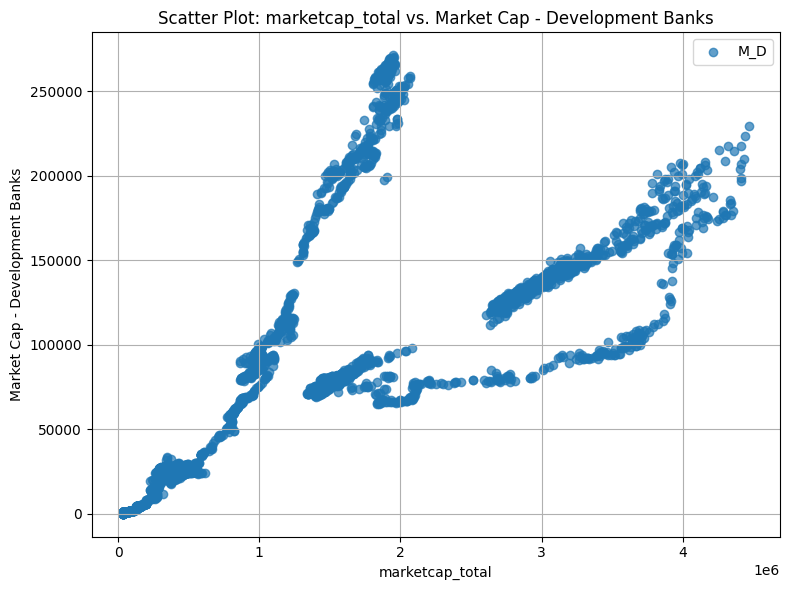

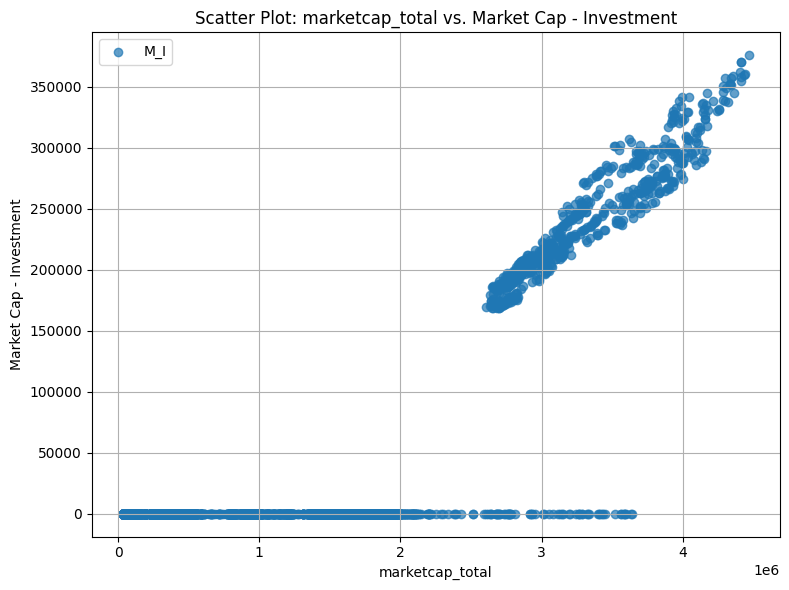

In [35]:
# Ensureing all columns except the date are numeric (handle potential errors)
try:
  numeric_data = df.select_dtypes(include=[float, int])
except:
  print("Error: Not all columns are numeric. Check data types.")
  exit()

def get_full_name(abbreviation):
    return abbreviation_to_fullname.get(abbreviation, abbreviation)

#Upadting Prefixes
nepse_prefix = 'N_'
market_cap_prefix = 'M_'

# Selecting NEPSE and Market Capitalization columns based on actual prefixes
nepse_columns = [col for col in numeric_data.columns if col.startswith(nepse_prefix)]
market_cap_columns = [col for col in numeric_data.columns if col.startswith(market_cap_prefix)]

# NEPSE metrics vs. NEPSE Index
nepse_index_col = 'nepse_index'  

if nepse_index_col in numeric_data.columns:  
    if not nepse_columns:  
        print("Warning: No NEPSE columns found based on the prefix.")
    else:
        for nepse_col in nepse_columns:
            #Drop rows with NaN in either column
            clean_data = numeric_data[[nepse_index_col, nepse_col]].dropna()
            
            plt.figure(figsize=(8, 6))
            plt.scatter(clean_data[nepse_index_col], clean_data[nepse_col], alpha=0.7, label=nepse_col)
            plt.title(f'Scatter Plot: {get_full_name(nepse_index_col)} vs. {get_full_name(nepse_col)}')
            plt.xlabel(get_full_name(nepse_index_col))
            plt.ylabel(get_full_name(nepse_col))
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

# Market Cap metrics vs. Market Cap Index
market_cap_index_col = 'marketcap_total'  

if market_cap_index_col in numeric_data.columns: 
    if not market_cap_columns:  
        print("Warning: No Market Cap columns found based on the prefix.")
    else:
        for market_cap_col in market_cap_columns:
            # Handle missing values 
            clean_data = numeric_data[[market_cap_index_col, market_cap_col]].dropna()

            if clean_data.shape[0] != clean_data[market_cap_index_col].shape[0]:
                # Handle missing values 
                    print(f"Warning: Different row counts for {market_cap_col} and {market_cap_index_col}. Consider handling missing values.")
            else:
                plt.figure(figsize=(8, 6))
                plt.scatter(clean_data[market_cap_index_col], clean_data[market_cap_col], alpha=0.7, label=market_cap_col)
                plt.title(f'Scatter Plot: {market_cap_index_col} vs. {market_cap_col}')
                plt.xlabel(market_cap_index_col)
                plt.ylabel(market_cap_col)

                plt.title(f'Scatter Plot: {get_full_name(market_cap_index_col)} vs. {get_full_name(market_cap_col)}')
                plt.xlabel(get_full_name(market_cap_index_col))
                plt.ylabel(get_full_name(market_cap_col))

                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()


### 2.8 Histograms

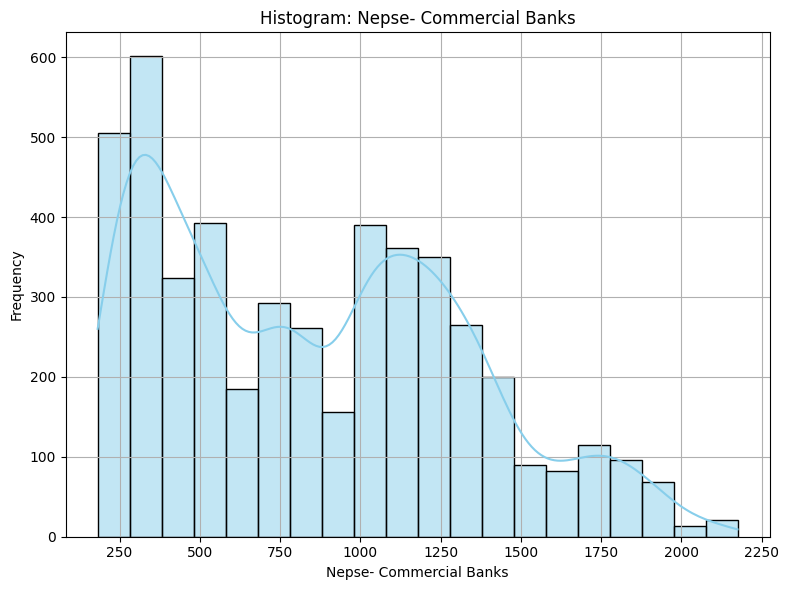

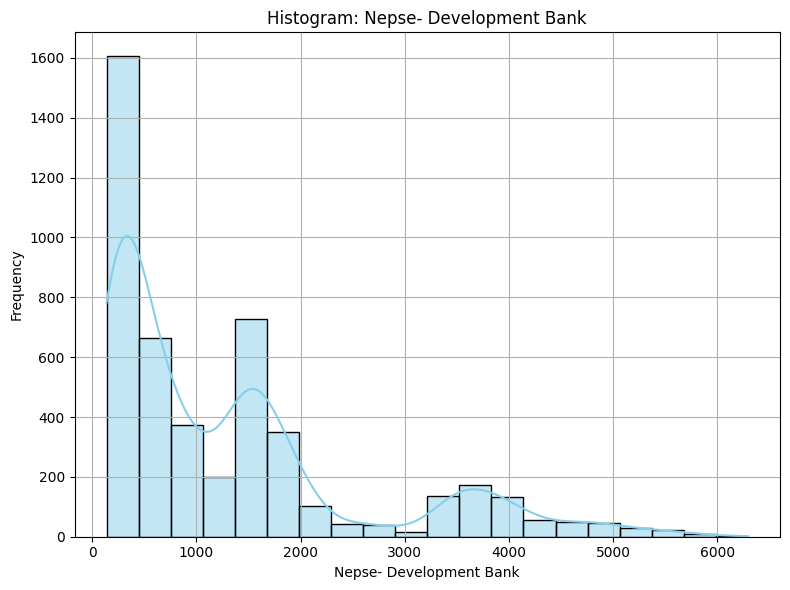

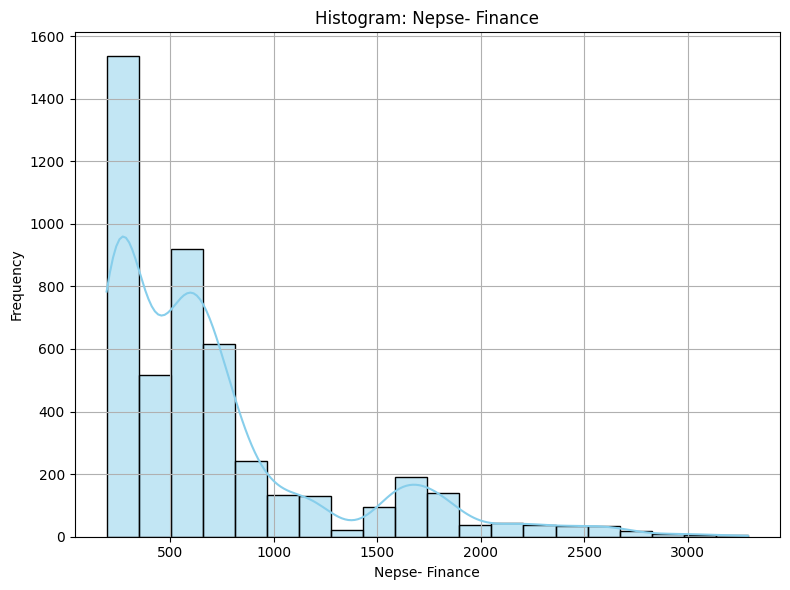

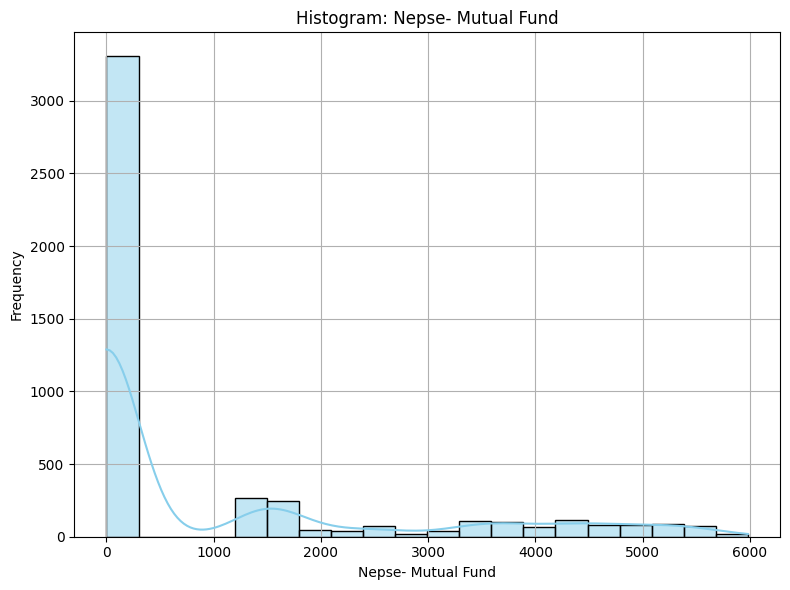

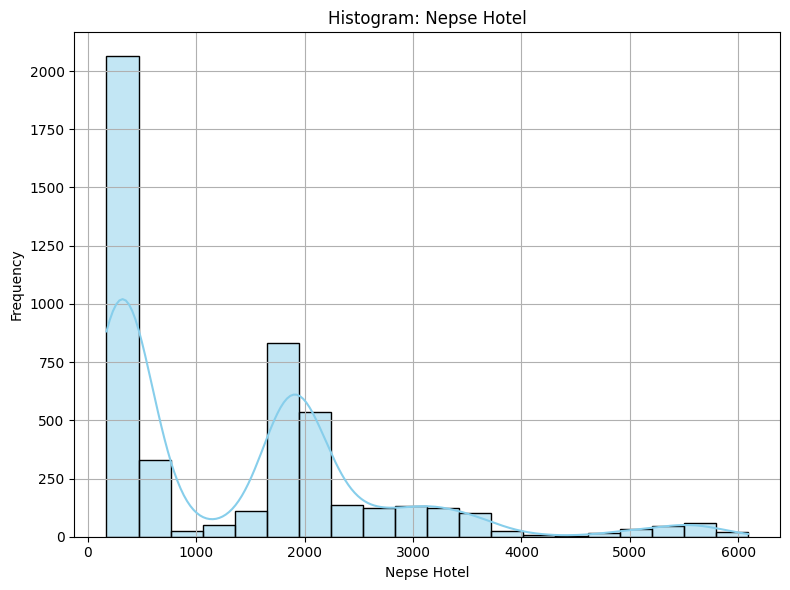

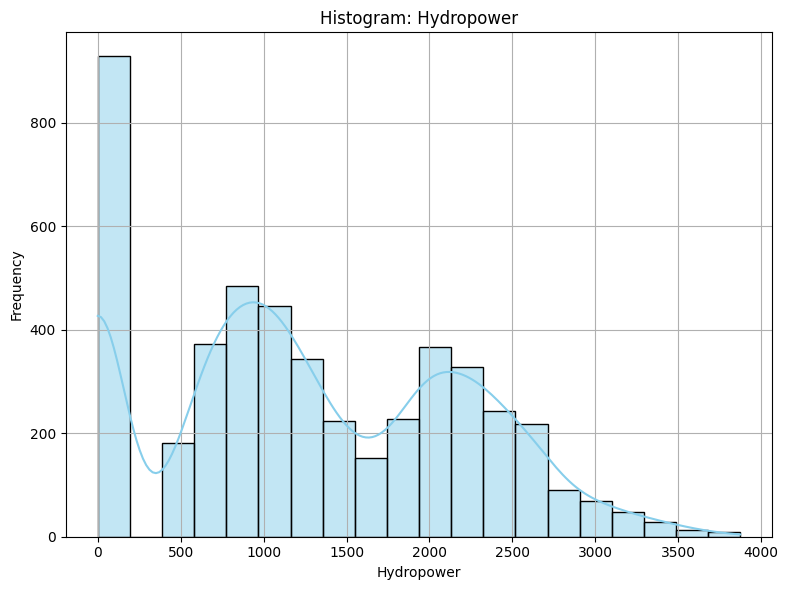

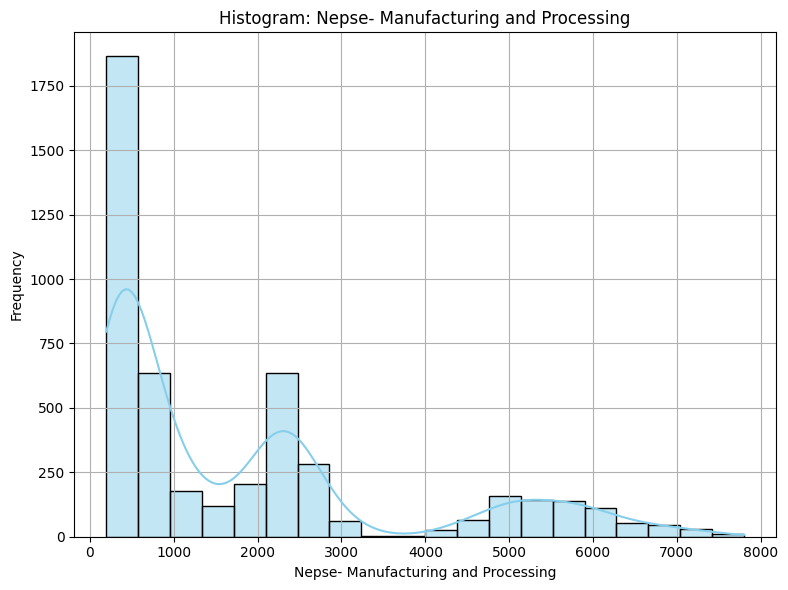

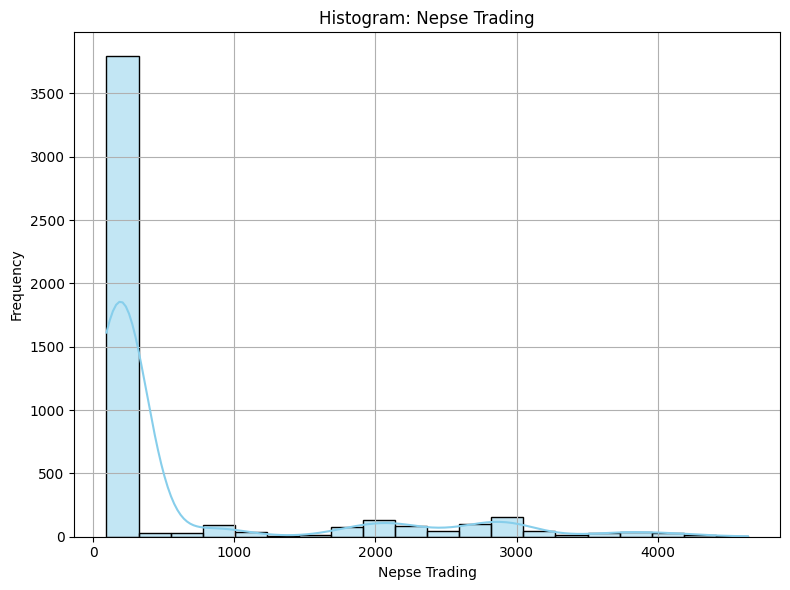

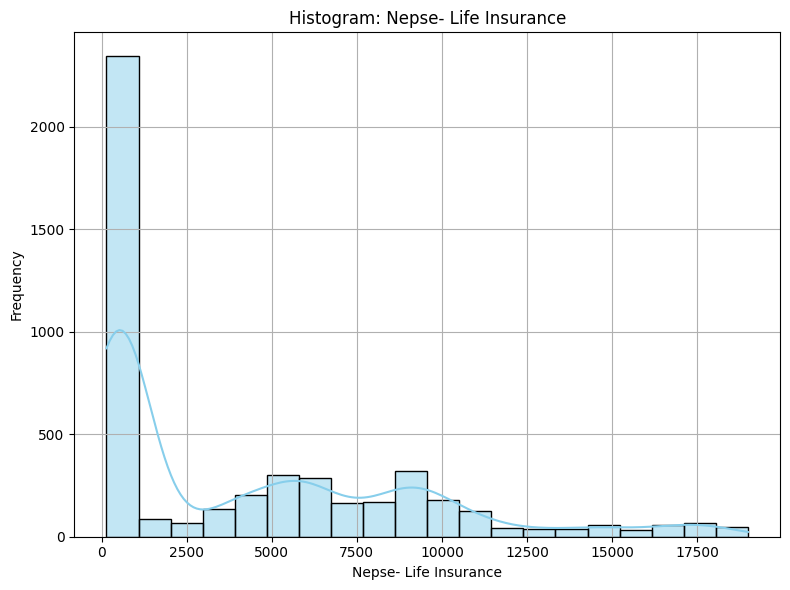

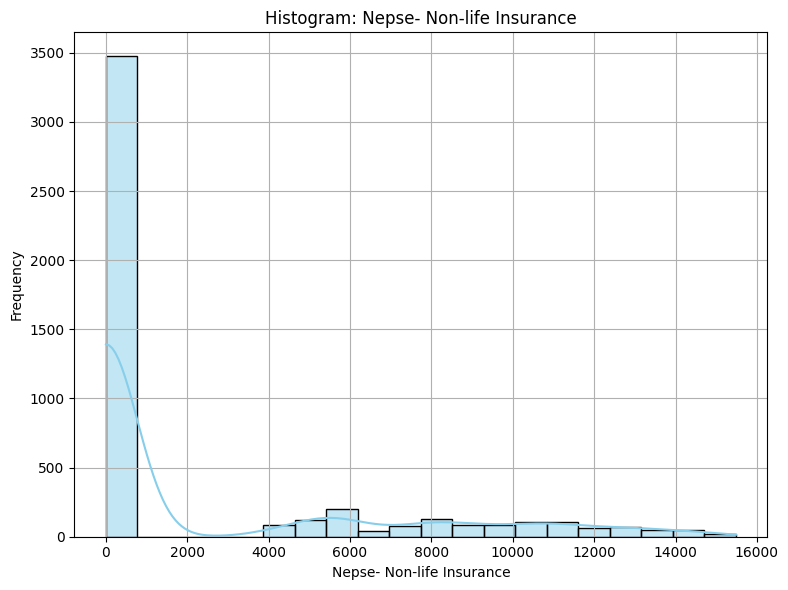

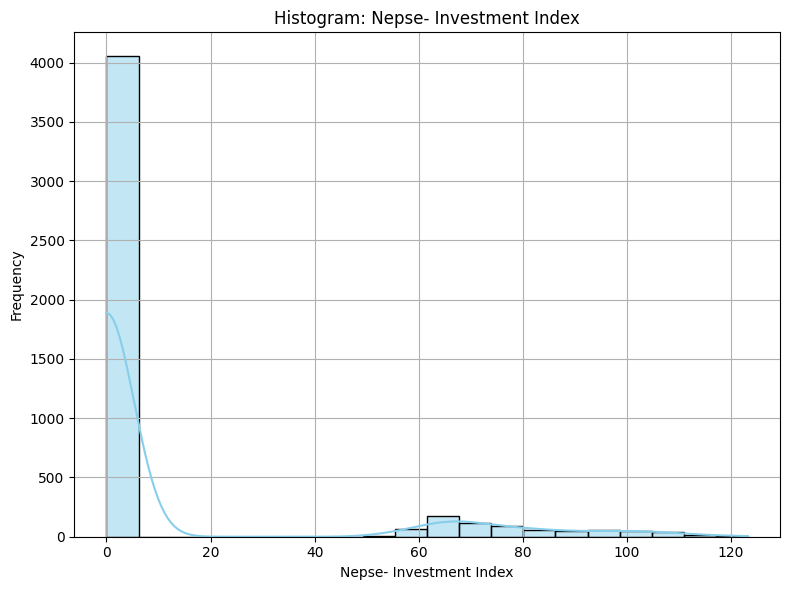

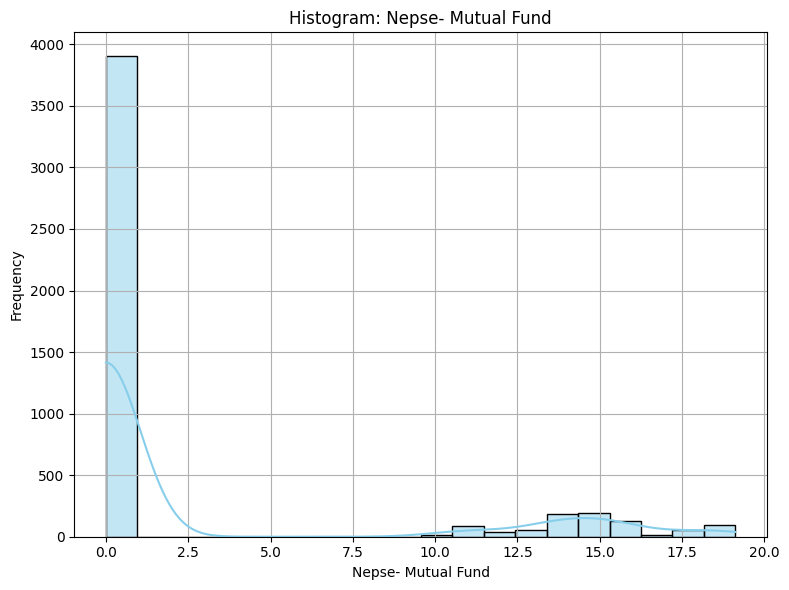

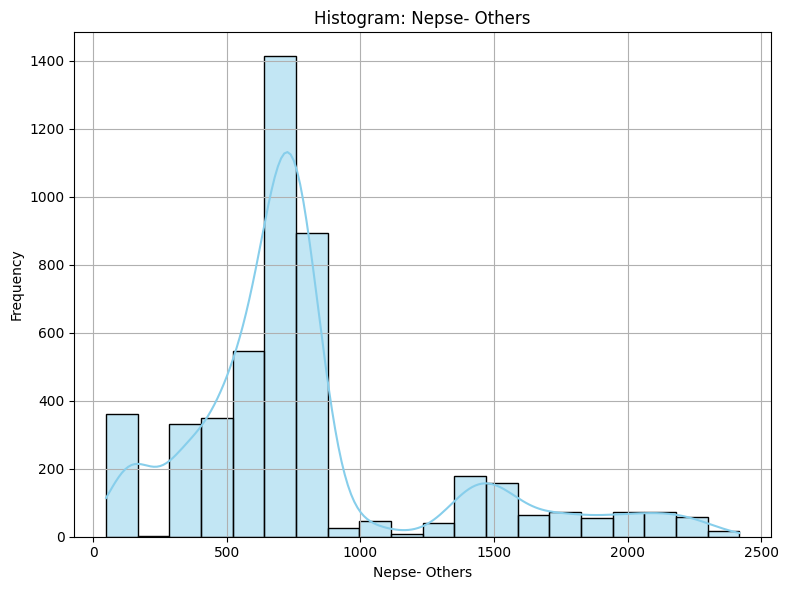

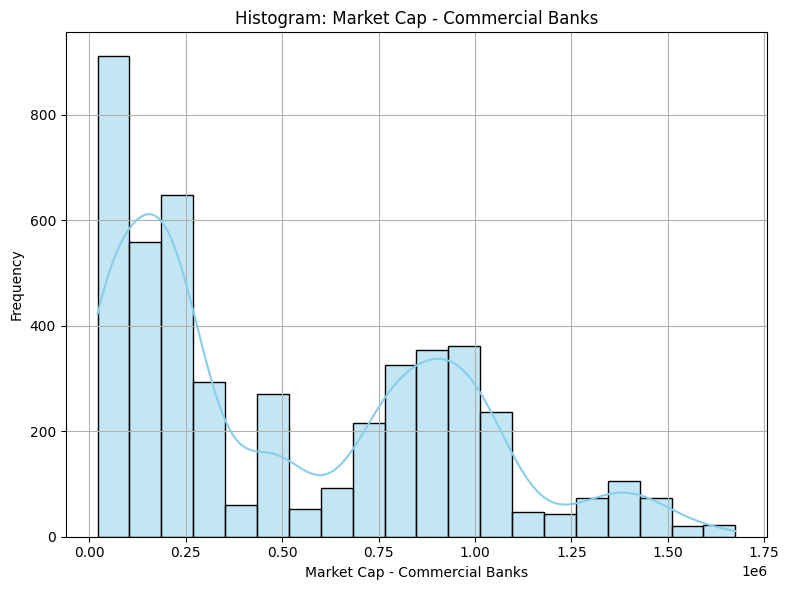

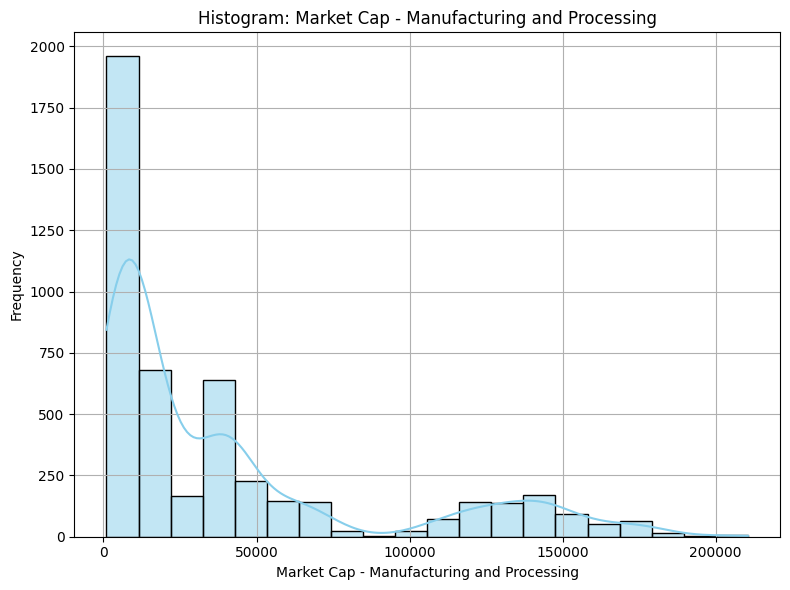

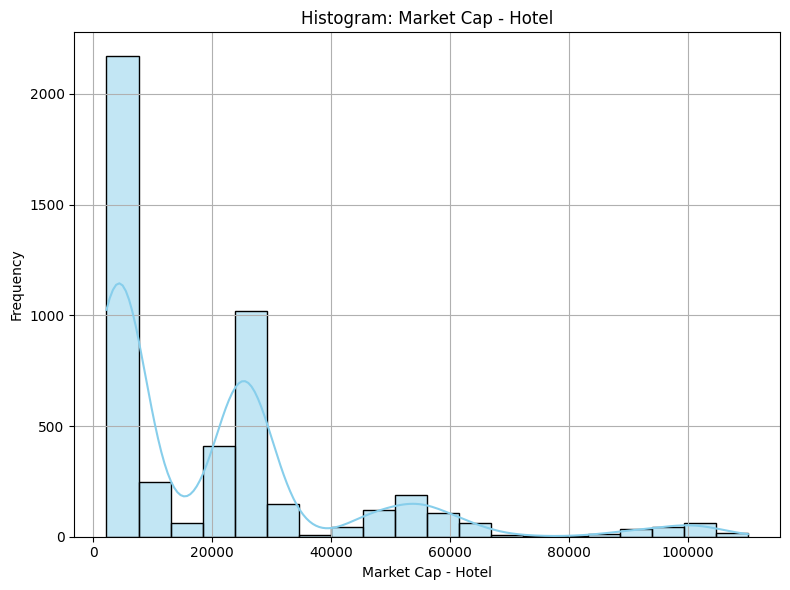

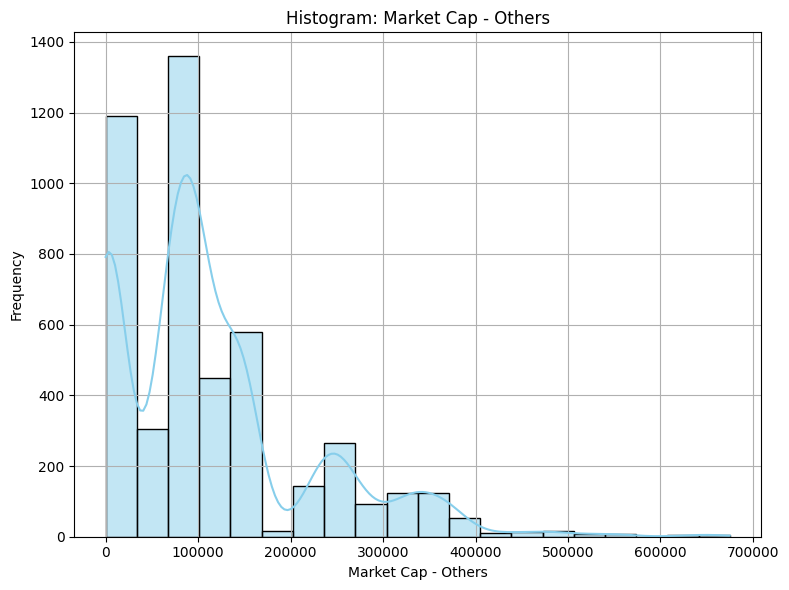

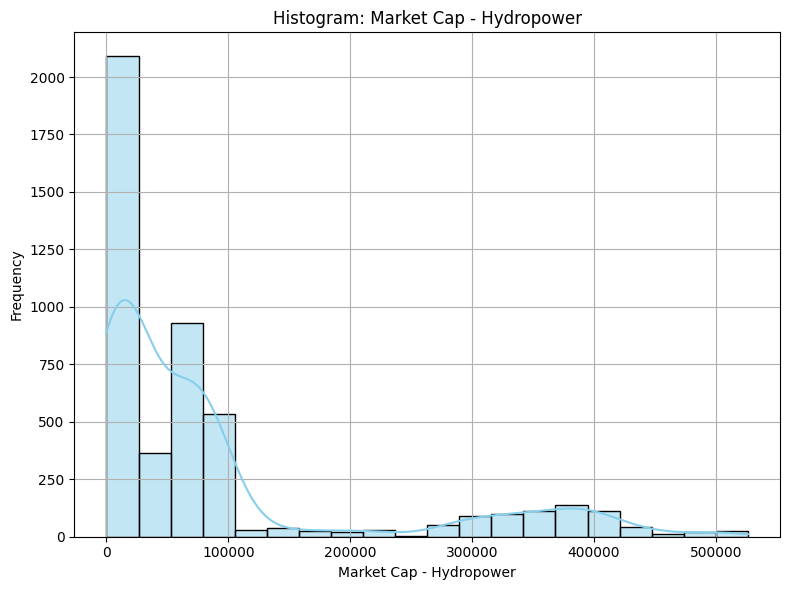

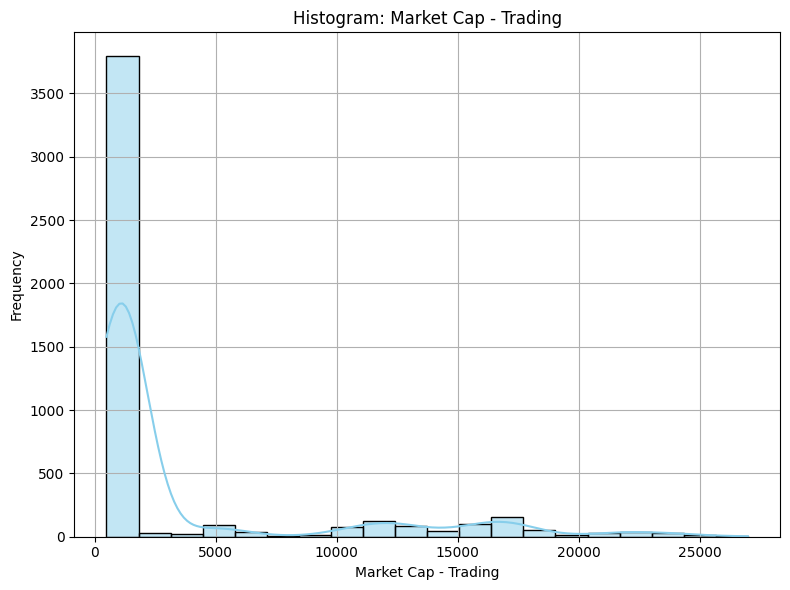

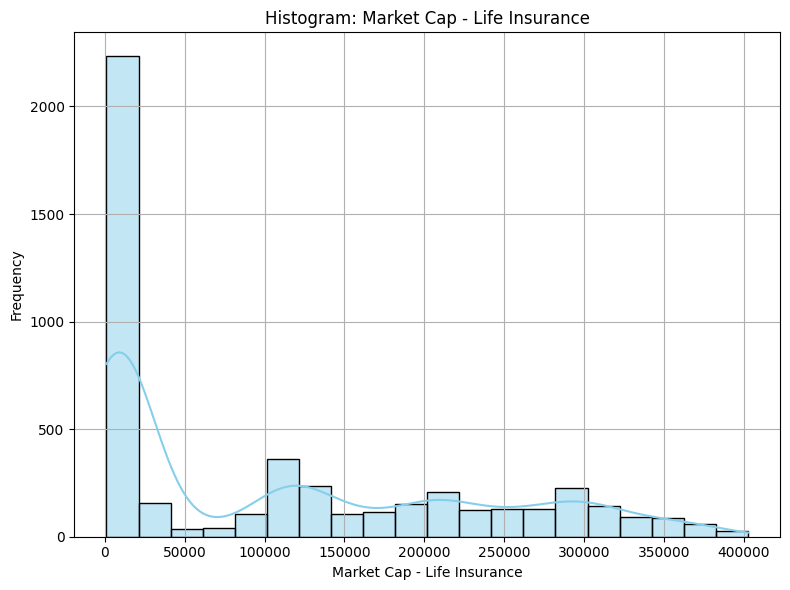

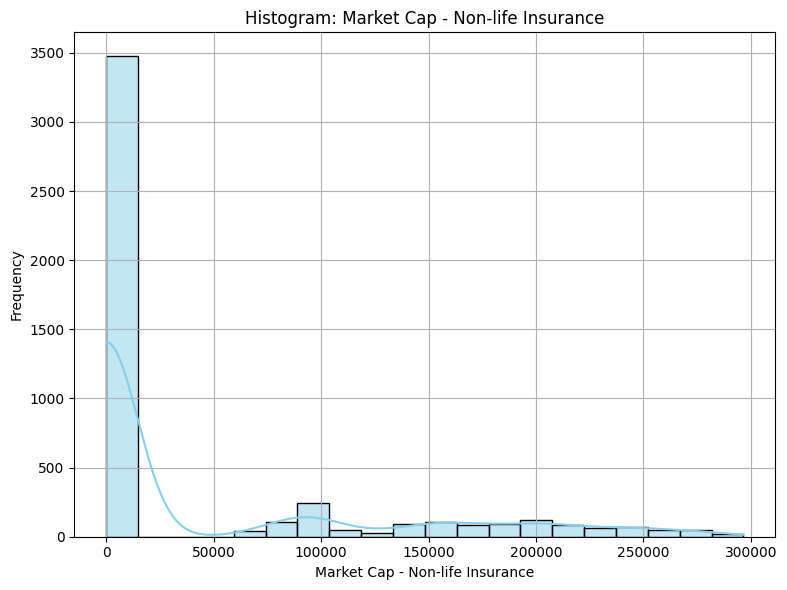

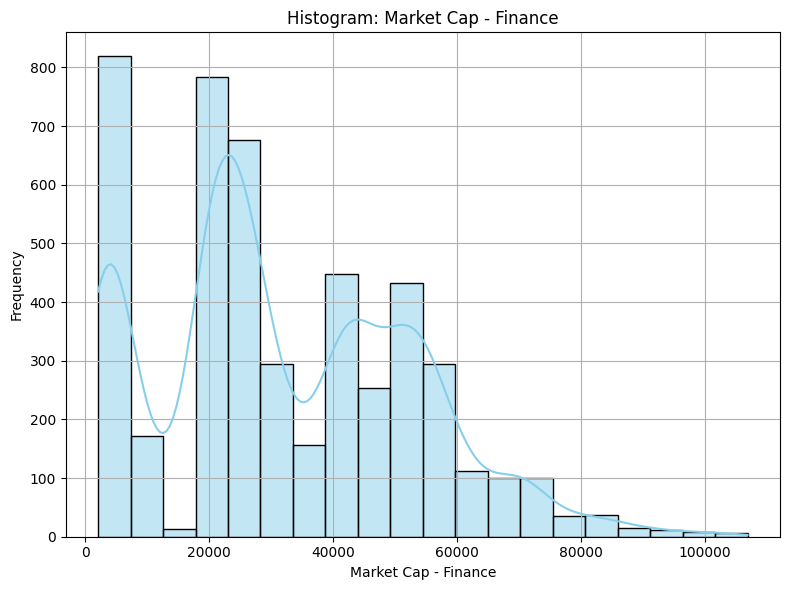

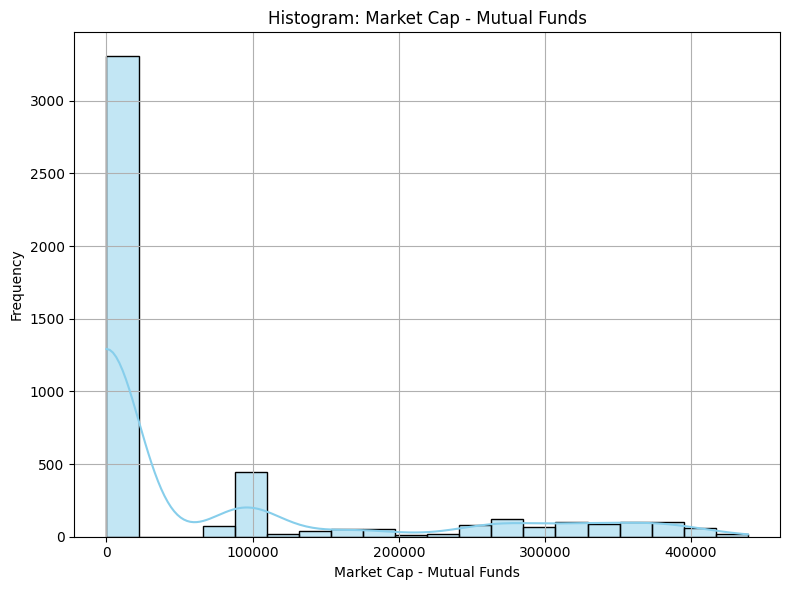

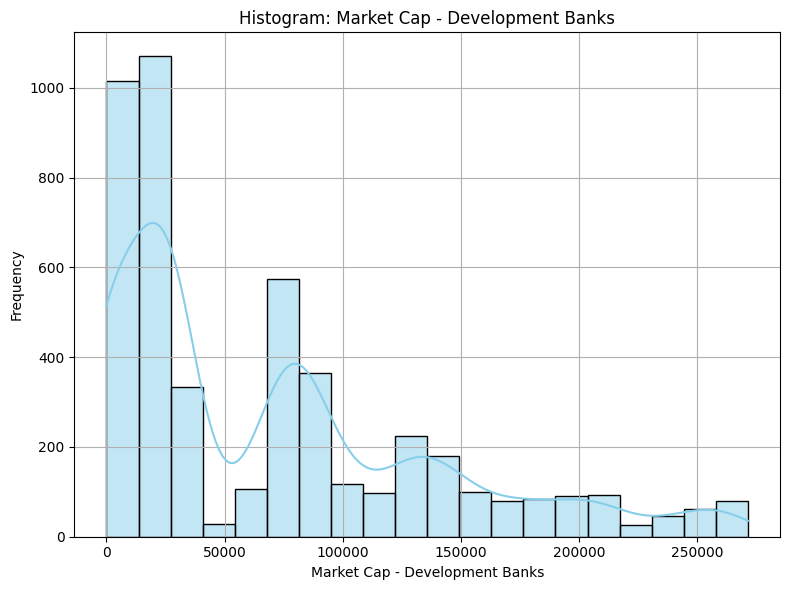

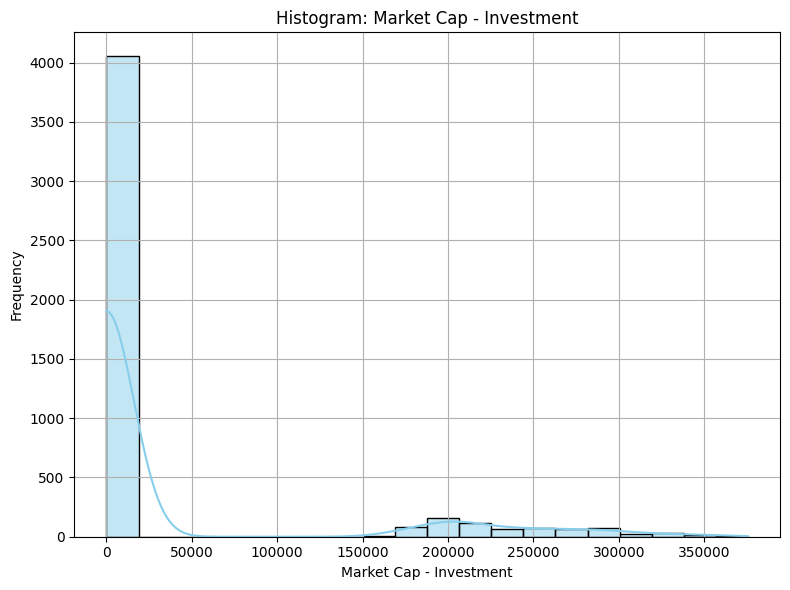

In [36]:
# Plotting histograms for NEPSE metrics
for nepse_col in nepse_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=nepse_col, bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram: {get_full_name(nepse_col)}')
    plt.xlabel(get_full_name(nepse_col))
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting histograms for Market Cap metrics
for market_cap_col in market_cap_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=market_cap_col, bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram: {get_full_name(market_cap_col)}')
    plt.xlabel(get_full_name(market_cap_col))
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### 2.9 Box Plots

In [37]:
# Filtering columns that start with 'M_' and 'N_'
m_columns = [col for col in df.columns if col.startswith('M_')]
n_columns = [col for col in df.columns if col.startswith('N_')]

# Replacing the column names with their full names if they exist in the dictionary
data_renamed = df.rename(columns={col: abbreviation_to_fullname[col] for col in df.columns if col in abbreviation_to_fullname})

# Filtering columns with full names for 'M_' and 'N_' columns
m_fullname_columns = [abbreviation_to_fullname[col] for col in m_columns if col in abbreviation_to_fullname]
n_fullname_columns = [abbreviation_to_fullname[col] for col in n_columns if col in abbreviation_to_fullname]

# Ensuring the filtered columns exist in the renamed dataframe
m_fullname_columns = [col for col in m_fullname_columns if col in data_renamed.columns]
n_fullname_columns = [col for col in n_fullname_columns if col in data_renamed.columns]

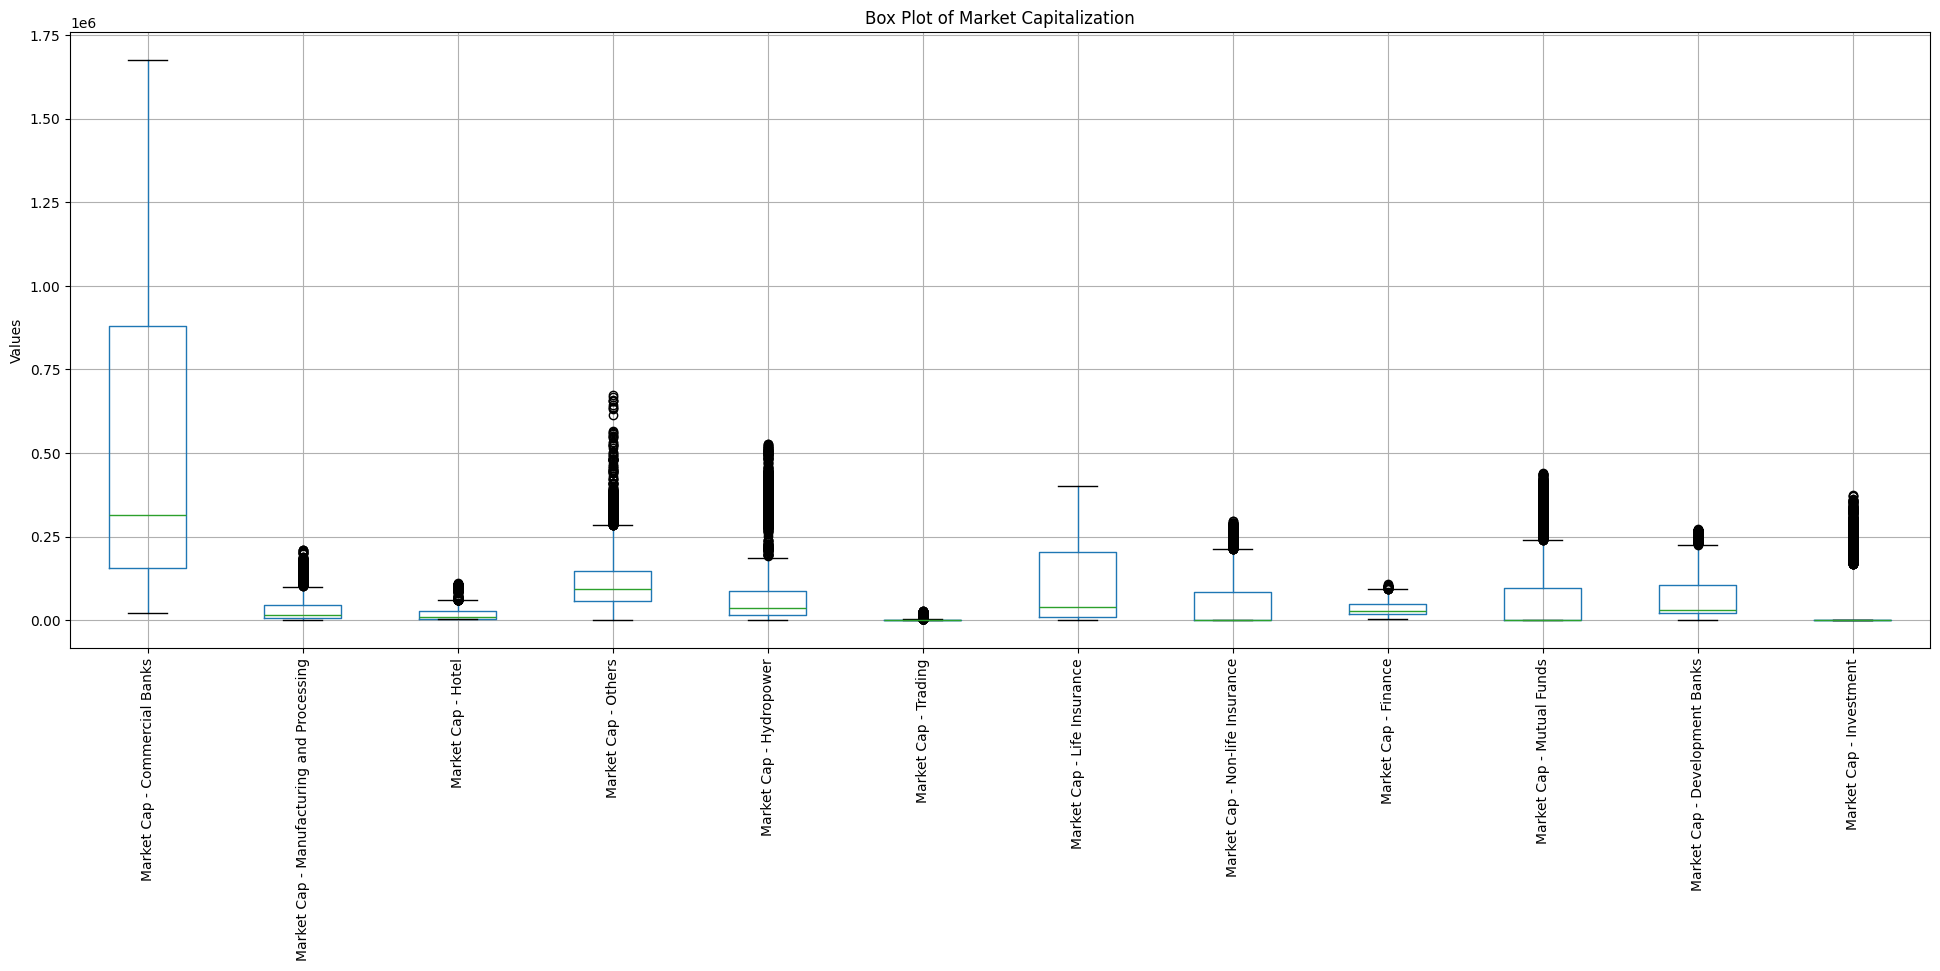

In [38]:
if m_fullname_columns:
    plt.figure(figsize=(24, 8))
    data_renamed.boxplot(column=m_fullname_columns)
    
    plt.title('Box Plot of Market Capitalization')
    plt.ylabel('Values')
    plt.xticks(rotation=90)
    plt.show()

Commercial banks are huge with no ouliers. Life Insurance also has no outliers,  whereas every other has outlier.

#### 2.10: Volatility

In [39]:
# Calculating volatility (standard deviation) for each industry
volatility = df.std()

# Filtering the volatility for Nepse indices and Market Cap separately
nepse_volatility = volatility.filter(like='N_')
marketcap_volatility = volatility.filter(like='M_')

# Converting indices to full names
nepse_volatility.index = nepse_volatility.index.map(abbreviation_to_fullname)
marketcap_volatility.index = marketcap_volatility.index.map(abbreviation_to_fullname)

# Finding the most and least volatile industry in each category
most_volatile_nepse = nepse_volatility.idxmax()
most_volatile_marketcap = marketcap_volatility.idxmax()
least_volatile_nepse = nepse_volatility.idxmin()
least_volatile_marketcap = marketcap_volatility.idxmin()

print("Most volatile industry in Nepse indices:")
print(f"{most_volatile_nepse} with a standard deviation of {nepse_volatility.max()}")

print("\nMost volatile industry in Market Cap:")
print(f"{most_volatile_marketcap} with a standard deviation of {marketcap_volatility.max()}")

print("\nLeast volatile industry in Nepse indices:")
print(f"{least_volatile_nepse} with a standard deviation of {nepse_volatility.min()}")

print("\nLeast volatile industry in Market Cap:")
print(f"{least_volatile_marketcap} with a standard deviation of {marketcap_volatility.min()}")

Most volatile industry in Nepse indices:
Nepse- Life Insurance with a standard deviation of 4751.6296120524485

Most volatile industry in Market Cap:
Market Cap - Commercial Banks with a standard deviation of 424804.34137086576

Least volatile industry in Nepse indices:
Nepse- Mutual Fund with a standard deviation of 5.720600771508439

Least volatile industry in Market Cap:
Market Cap - Trading with a standard deviation of 5654.087889853217


#### 2.11: Market Changes

In [41]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and abbreviation_to_fullname is your mapping dictionary

# Ensure that df contains only numeric data
numeric_df = df.select_dtypes(include=[np.number])

# Calculating growth for each industry
growth = (numeric_df.iloc[-1] - numeric_df.iloc[0]) / numeric_df.iloc[0] * 100

# Filtering the growth for Nepse indices and Market Cap separately
nepse_growth = growth.filter(like='N_')
marketcap_growth = growth.filter(like='M_')

# Assuming abbreviation_to_fullname is a predefined dictionary mapping abbreviations to full names
nepse_growth.index = nepse_growth.index.map(abbreviation_to_fullname)
marketcap_growth.index = marketcap_growth.index.map(abbreviation_to_fullname)

# Finding the industry with the most growth in each category
most_growth_nepse = nepse_growth.idxmax()
most_growth_marketcap = marketcap_growth.idxmax()

print("\nIndustry with the most growth in Nepse indices:")
print(f"{most_growth_nepse} with a growth of {nepse_growth[most_growth_nepse]}%")

print("\nIndustry with the most growth in Market Cap:")
print(f"{most_growth_marketcap} with a growth of {marketcap_growth[most_growth_marketcap]}%")

# Finding the industry with the least growth in each category
least_growth_nepse = nepse_growth.idxmin()
least_growth_marketcap = marketcap_growth.idxmin()

print("\nIndustry with the least return in Nepse indices:")
print(f"{least_growth_nepse} with a growth of {nepse_growth[least_growth_nepse]}%")

print("\nIndustry with the least return in Market Cap:")
print(f"{least_growth_marketcap} with a growth of {marketcap_growth[least_growth_marketcap]}%")



Industry with the most growth in Nepse indices:
Nepse- Mutual Fund with a growth of Nepse- Mutual Fund    inf
Nepse- Mutual Fund    inf
dtype: float64%

Industry with the most growth in Market Cap:
Market Cap - Hydropower with a growth of inf%

Industry with the least return in Nepse indices:
Nepse- Commercial Banks with a growth of 466.58837104299397%

Industry with the least return in Market Cap:
Market Cap - Hotel with a growth of 1945.6565848709654%


### 3.0.1: Anamoly Detection

In [42]:
from scipy.stats import zscore

# Calculating Z-scores for all numeric columns
numeric_cols = df.select_dtypes(include=['float64']).columns
z_scores = df[numeric_cols].apply(zscore)

# Defining a threshold for identifying anomalies
threshold = 3

# Identifying anomalies
anomalies = (z_scores.abs() > threshold)

# Summarizing the anomalies
anomalies_summary = anomalies.sum().sort_values(ascending=False)

# Displaying the columns with the most anomalies
anomalies_summary

M_H                163
N_H                124
M_T                121
N_T                121
N_I                118
N_F                101
M_I                 99
N_O                 61
M_O                 55
N_D                 53
M_Hydro             47
M_NI                19
M_F                 17
M_MP                14
N_LI                10
N_NI                10
N_MP                 9
nepse_index          8
M_MF                 7
N_MF                 2
N_CB                 0
M_D                  0
sensitive_index      0
M_LI                 0
M_C                  0
sensitive_float      0
N_Muf                0
N_Hydro              0
marketcap_total      0
dtype: int64

#### 3.0.2 : Anamoly Plotting

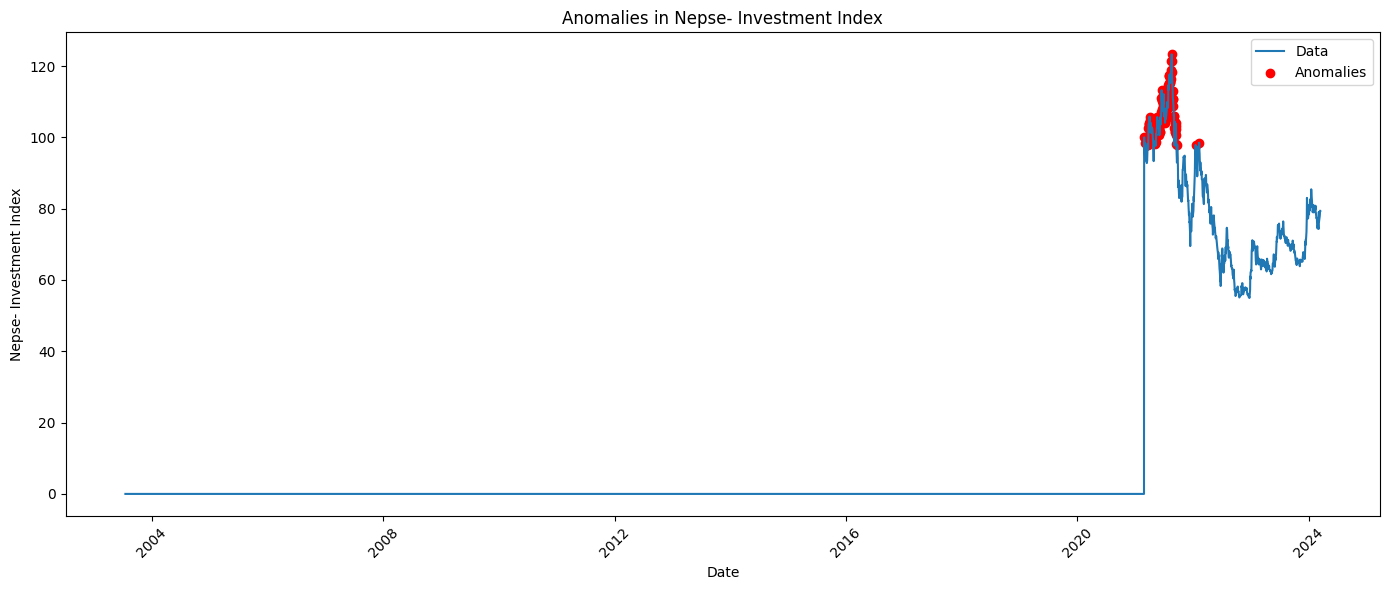

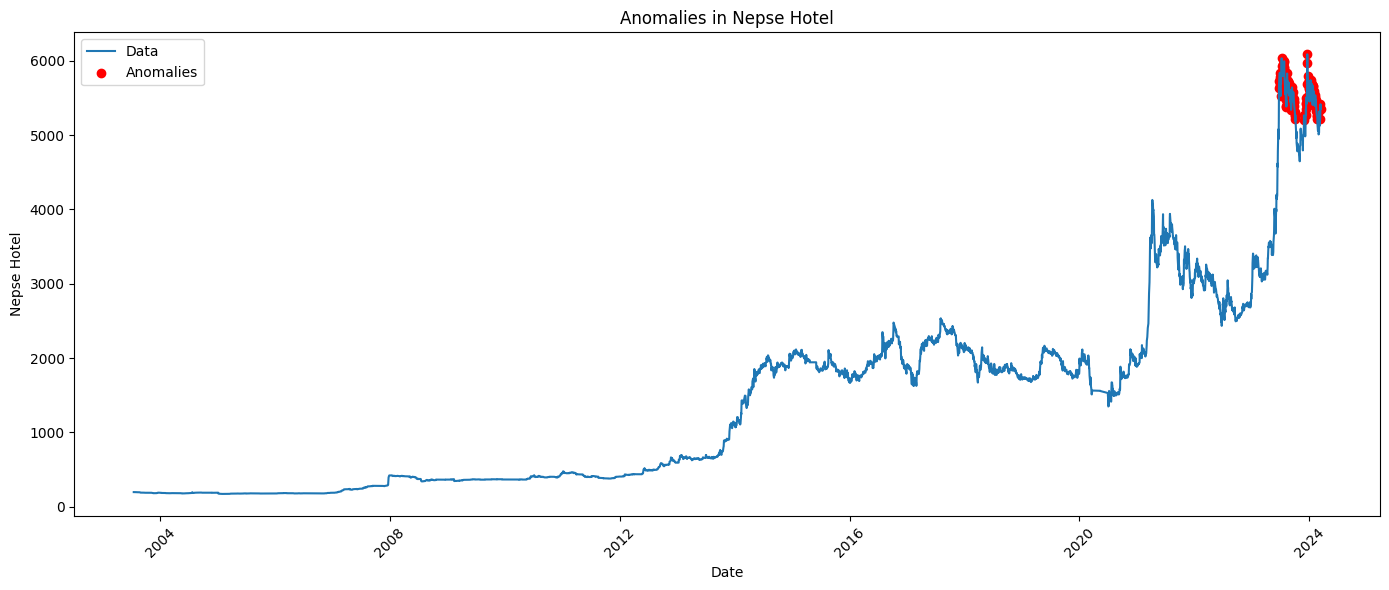

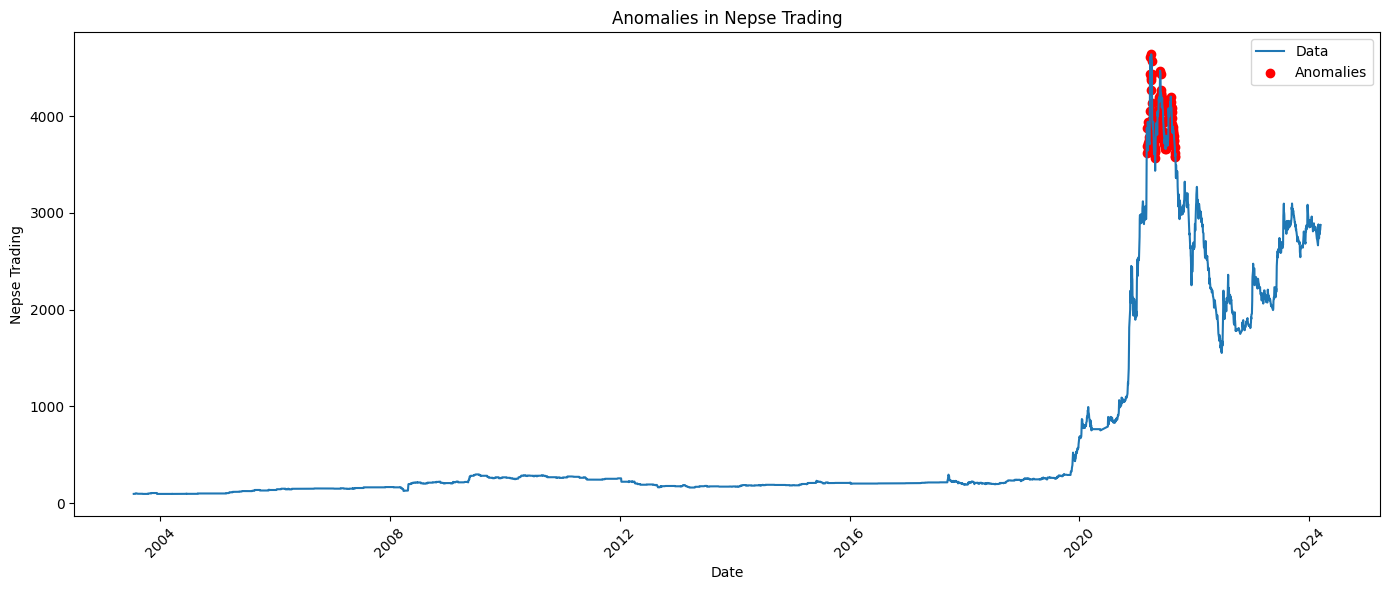

In [43]:
# Function to plot anomalies
def plot_anomalies(column_name):
    full_name = abbreviation_to_fullname.get(column_name, column_name)
    
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date/Month'], df[column_name], label='Data')
    plt.scatter(df['Date/Month'][anomalies[column_name]], 
                df[column_name][anomalies[column_name]], 
                color='red', label='Anomalies')
    plt.title(f'Anomalies in {full_name}')
    plt.xlabel('Date')
    plt.ylabel(full_name)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting anomalies for the columns with the most anomalies
plot_anomalies('N_I')
plot_anomalies('N_H')
plot_anomalies('N_T')

#### 3.0.3: Anamoly Plotting with Random Sampling


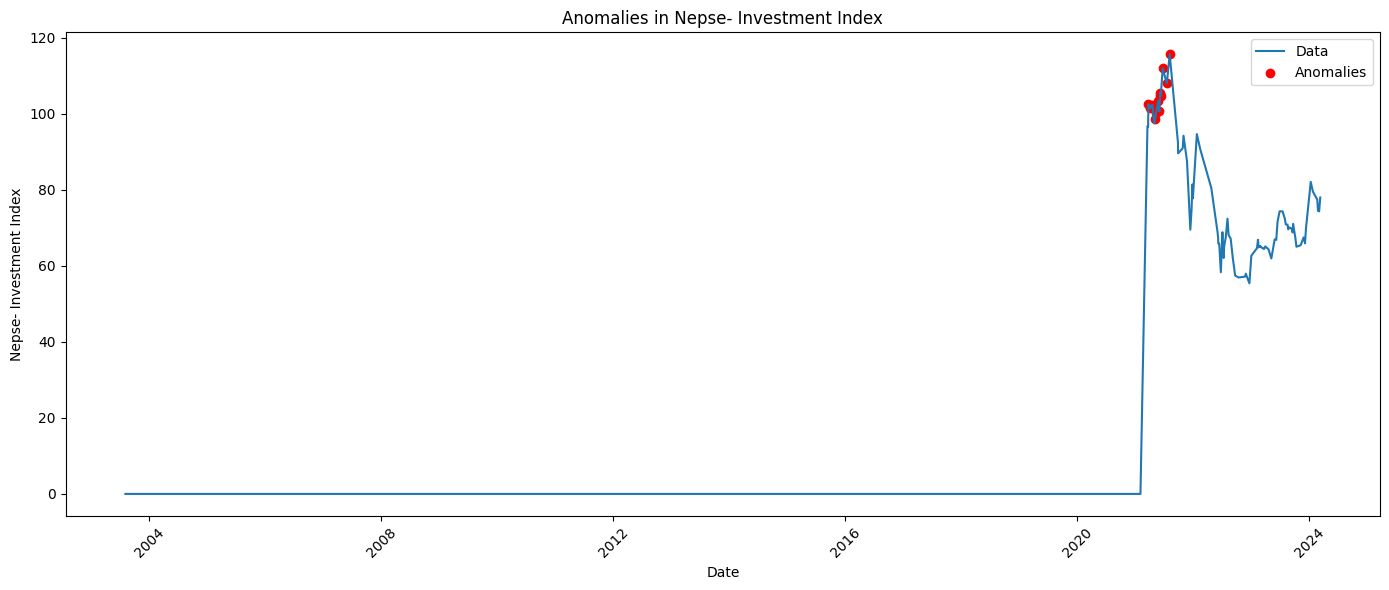

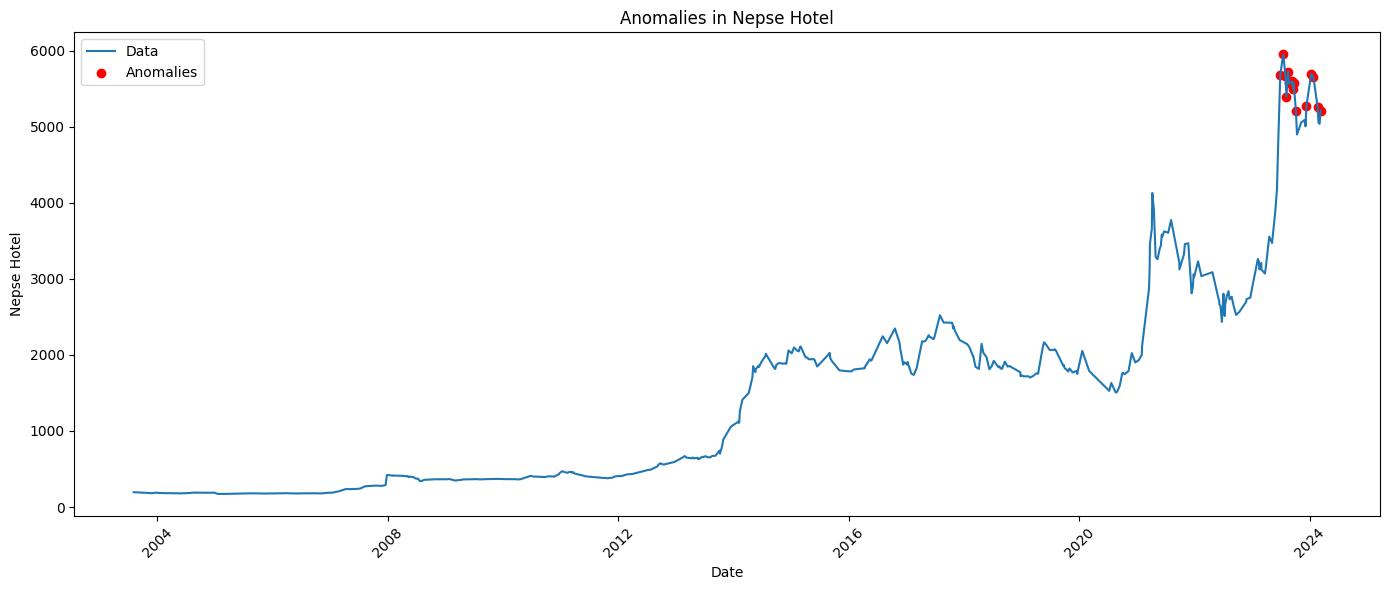

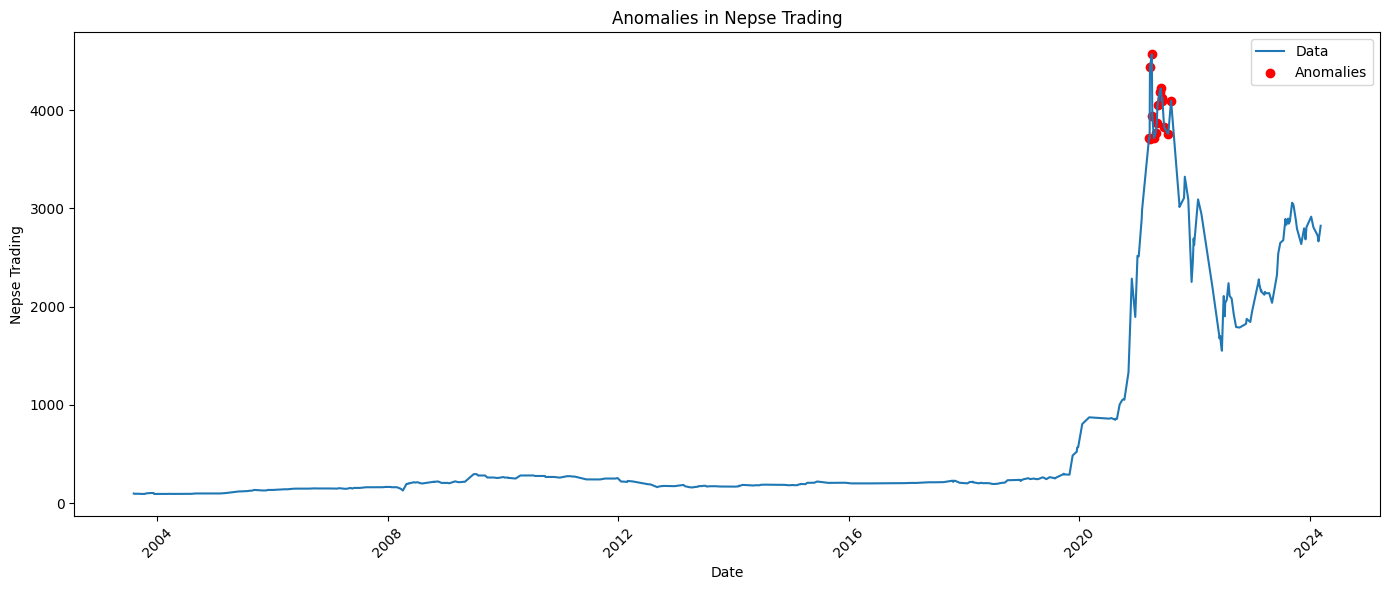

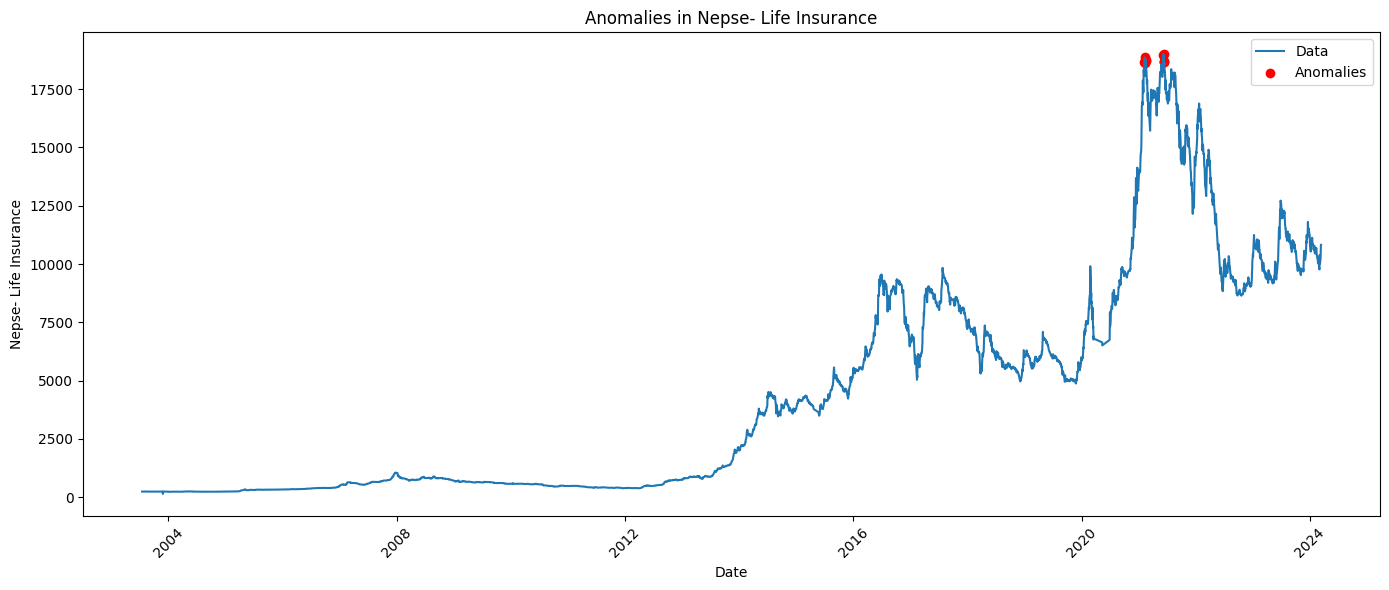

In [44]:
# Function to plot anomalies with sampling
def plot_anomalies_sampled(column_name, sample_size=500):
    sample_data = df.sample(n=sample_size, random_state=1).sort_values('Date/Month')
    sample_anomalies = anomalies.loc[sample_data.index, column_name]

    full_name = abbreviation_to_fullname.get(column_name, column_name)
    
    plt.figure(figsize=(14, 6))
    plt.plot(sample_data['Date/Month'], sample_data[column_name], label='Data')
    plt.scatter(sample_data['Date/Month'][sample_anomalies], 
                sample_data[column_name][sample_anomalies], 
                color='red', label='Anomalies')
    plt.title(f'Anomalies in {full_name}')
    plt.xlabel('Date')
    plt.ylabel(full_name)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting anomalies for the columns with the most anomalies with sampling
plot_anomalies_sampled('N_I')
plot_anomalies_sampled('N_H')
plot_anomalies_sampled('N_T')
plot_anomalies('N_LI')

#### 3.0.4 : Anaoly Detection with specific dates

Dates with severe anomalies in Nepse- Investment Index: [Timestamp('2021-03-24 00:00:00'), Timestamp('2021-04-05 00:00:00'), Timestamp('2021-04-08 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-05-25 00:00:00'), Timestamp('2021-06-01 00:00:00'), Timestamp('2021-06-07 00:00:00'), Timestamp('2021-06-08 00:00:00'), Timestamp('2021-06-10 00:00:00'), Timestamp('2021-06-22 00:00:00'), Timestamp('2021-07-18 00:00:00'), Timestamp('2021-08-05 00:00:00')]


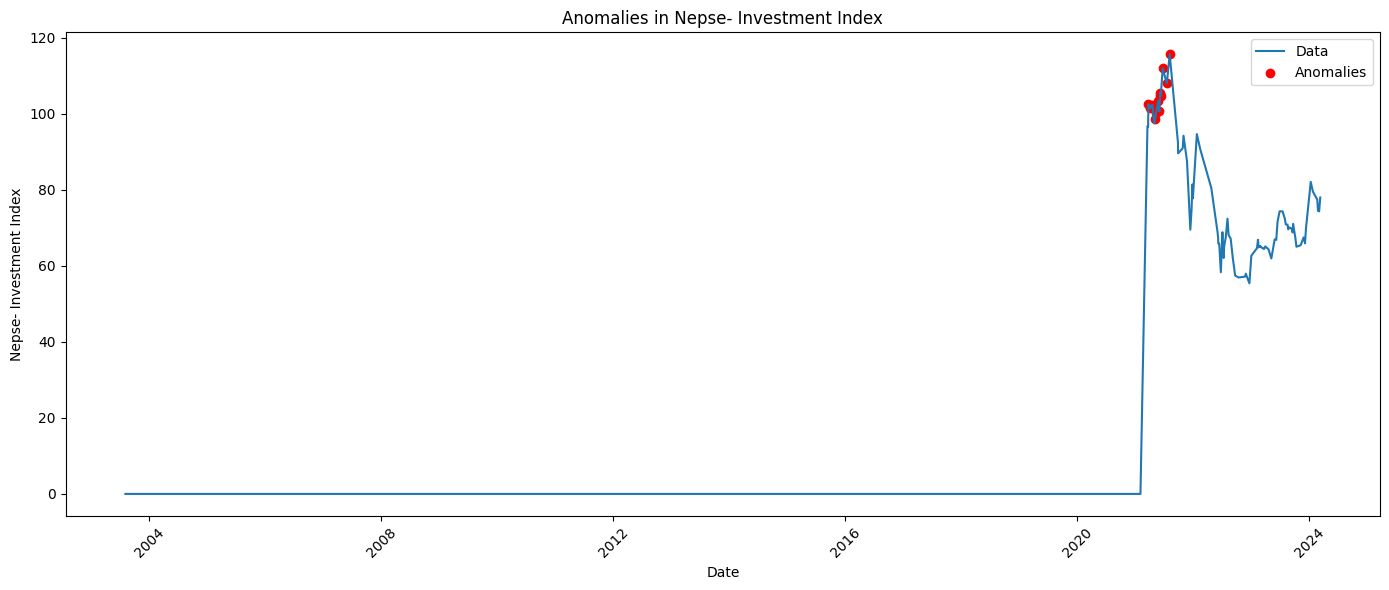

Dates with severe anomalies in Nepse Hotel: [Timestamp('2023-06-28 00:00:00'), Timestamp('2023-07-17 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-06 00:00:00'), Timestamp('2023-08-17 00:00:00'), Timestamp('2023-08-21 00:00:00'), Timestamp('2023-08-28 00:00:00'), Timestamp('2023-09-11 00:00:00'), Timestamp('2023-09-18 00:00:00'), Timestamp('2023-09-21 00:00:00'), Timestamp('2023-10-05 00:00:00'), Timestamp('2023-12-11 00:00:00'), Timestamp('2024-01-10 00:00:00'), Timestamp('2024-01-24 00:00:00'), Timestamp('2024-02-20 00:00:00'), Timestamp('2024-03-10 00:00:00')]


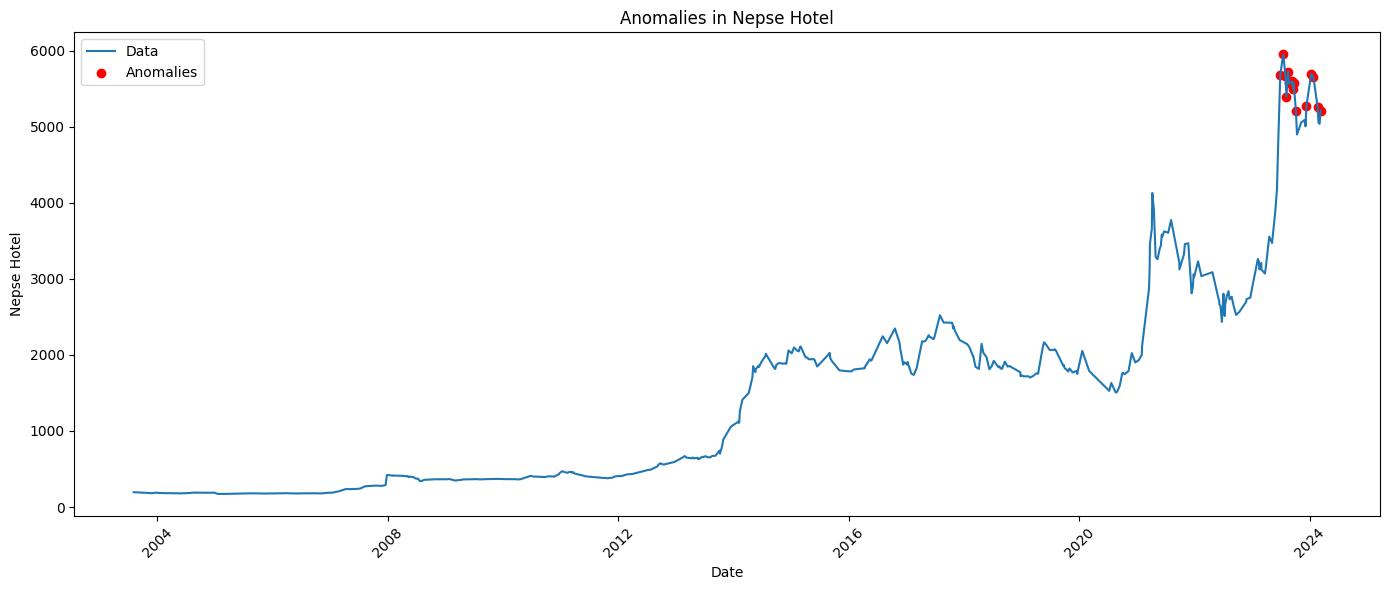

Dates with severe anomalies in Nepse Trading: [Timestamp('2021-03-18 00:00:00'), Timestamp('2021-03-22 00:00:00'), Timestamp('2021-03-24 00:00:00'), Timestamp('2021-04-05 00:00:00'), Timestamp('2021-04-08 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-04-29 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-05-25 00:00:00'), Timestamp('2021-06-01 00:00:00'), Timestamp('2021-06-07 00:00:00'), Timestamp('2021-06-08 00:00:00'), Timestamp('2021-06-10 00:00:00'), Timestamp('2021-06-22 00:00:00'), Timestamp('2021-07-18 00:00:00'), Timestamp('2021-08-05 00:00:00')]


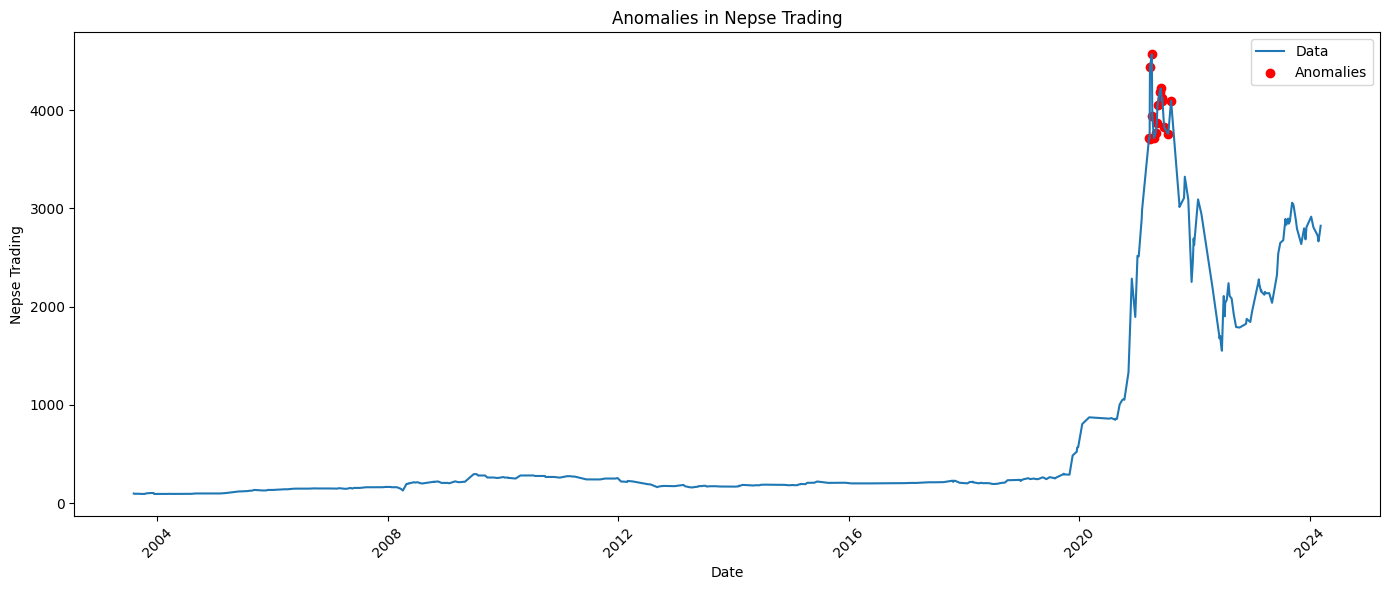

In [45]:
# Function to sample and print exact dates of severe anomalies
def print_anomaly_dates(column_name, sample_size=500):
    sample_data = df.sample(n=sample_size, random_state=1).sort_values('Date/Month')
    sample_anomalies = anomalies.loc[sample_data.index, column_name]
    
    # Printing dates of anomalies
    anomaly_dates = sample_data['Date/Month'][sample_anomalies].to_list()
    print(f'Dates with severe anomalies in {abbreviation_to_fullname.get(column_name, column_name)}: {anomaly_dates}')

    # Plotting
    full_name = abbreviation_to_fullname.get(column_name, column_name)
    
    plt.figure(figsize=(14, 6))
    plt.plot(sample_data['Date/Month'], sample_data[column_name], label='Data')
    plt.scatter(sample_data['Date/Month'][sample_anomalies], 
                sample_data[column_name][sample_anomalies], 
                color='red', label='Anomalies')
    plt.title(f'Anomalies in {full_name}')
    plt.xlabel('Date')
    plt.ylabel(full_name)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
print_anomaly_dates('N_I')
print_anomaly_dates('N_H')
print_anomaly_dates('N_T')